<a href="https://colab.research.google.com/github/Guest1537/AD-BP_mvp/blob/main/PUCrj_MPV2_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

##### Pedro Caleffi Barbosa

## 1. Definição do problema

As alterações climáticas ocorrem sem se restringirem aos limites geográficos de países ou municípios (Espínola e Ribeiro, 2020). Em nível global, as nações têm promovido eventos, como as Conferências das Nações Unidas sobre Mudanças Climáticas (COPs), nas quais são debatidas medidas a serem adotadas coletivamente para mitigar os impactos da crise climática. Durante a COP 21, 195 países firmaram um compromisso internacional de limitar, até 2030, o aumento da temperatura global a menos de 2°C em comparação com as medições pré-Revolução Industrial.

Como citado pelo *Intergovernamental Pannel for Climate Change* (IPCC, 2023), o aumento da temperatura média global observado entre 1850 e 2019, entre +0,8°C e +1,3°C, com uma estimativa de 1,07°C, tem apresentado provável relação com a emissão de gases de efeito estufa realizada através de atividades humanas. Tendo em vista o compromisso tomado por 195 países na assinatura do Acordo de Paris (UNFCCC, 2015) durante a COP 21, a importância da mensuração das emissões realizadas é essencial para tomada de decisão objetiva. Para tal, foram coletados dados disponíveis para a emissão de gases de efeito estufa no Brasil segundo o Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa (SEEG) - acessível pelo link: https://seeg.eco.br/. Segundo o próprio Sistema:

> "O SEEG é a principal plataforma de monitoramento de emissões de gases de efeito estufa na América Latina e uma das maiores bases de dados nacionais de emissões do mundo. Ele fornece estimativas anuais de emissões de gases de efeito estufa no Brasil para todos os setores da economia, numa plataforma on-line de fácil acesso com dados que vêm desde 1970, além de análises e soluções para tomadores de decisão. Os dados do SEEG visam informar as políticas públicas de mitigação, bem como dar transparência à sociedade sobre as trajetórias de redução de emissões do país."


Em 26/11/2023 o site estava em atualização, não havendo possibilidade de download do arquivo utilizado, então ele foi disponibilizado de maneira pública em ambiente [Google Drive](https://docs.google.com/spreadsheets/d/1JwncYIOJd0m1cLgR1Fovdyt-vLN9KUbr/edit?usp=drive_link&ouid=117863055539952818718&rtpof=true&sd=true)


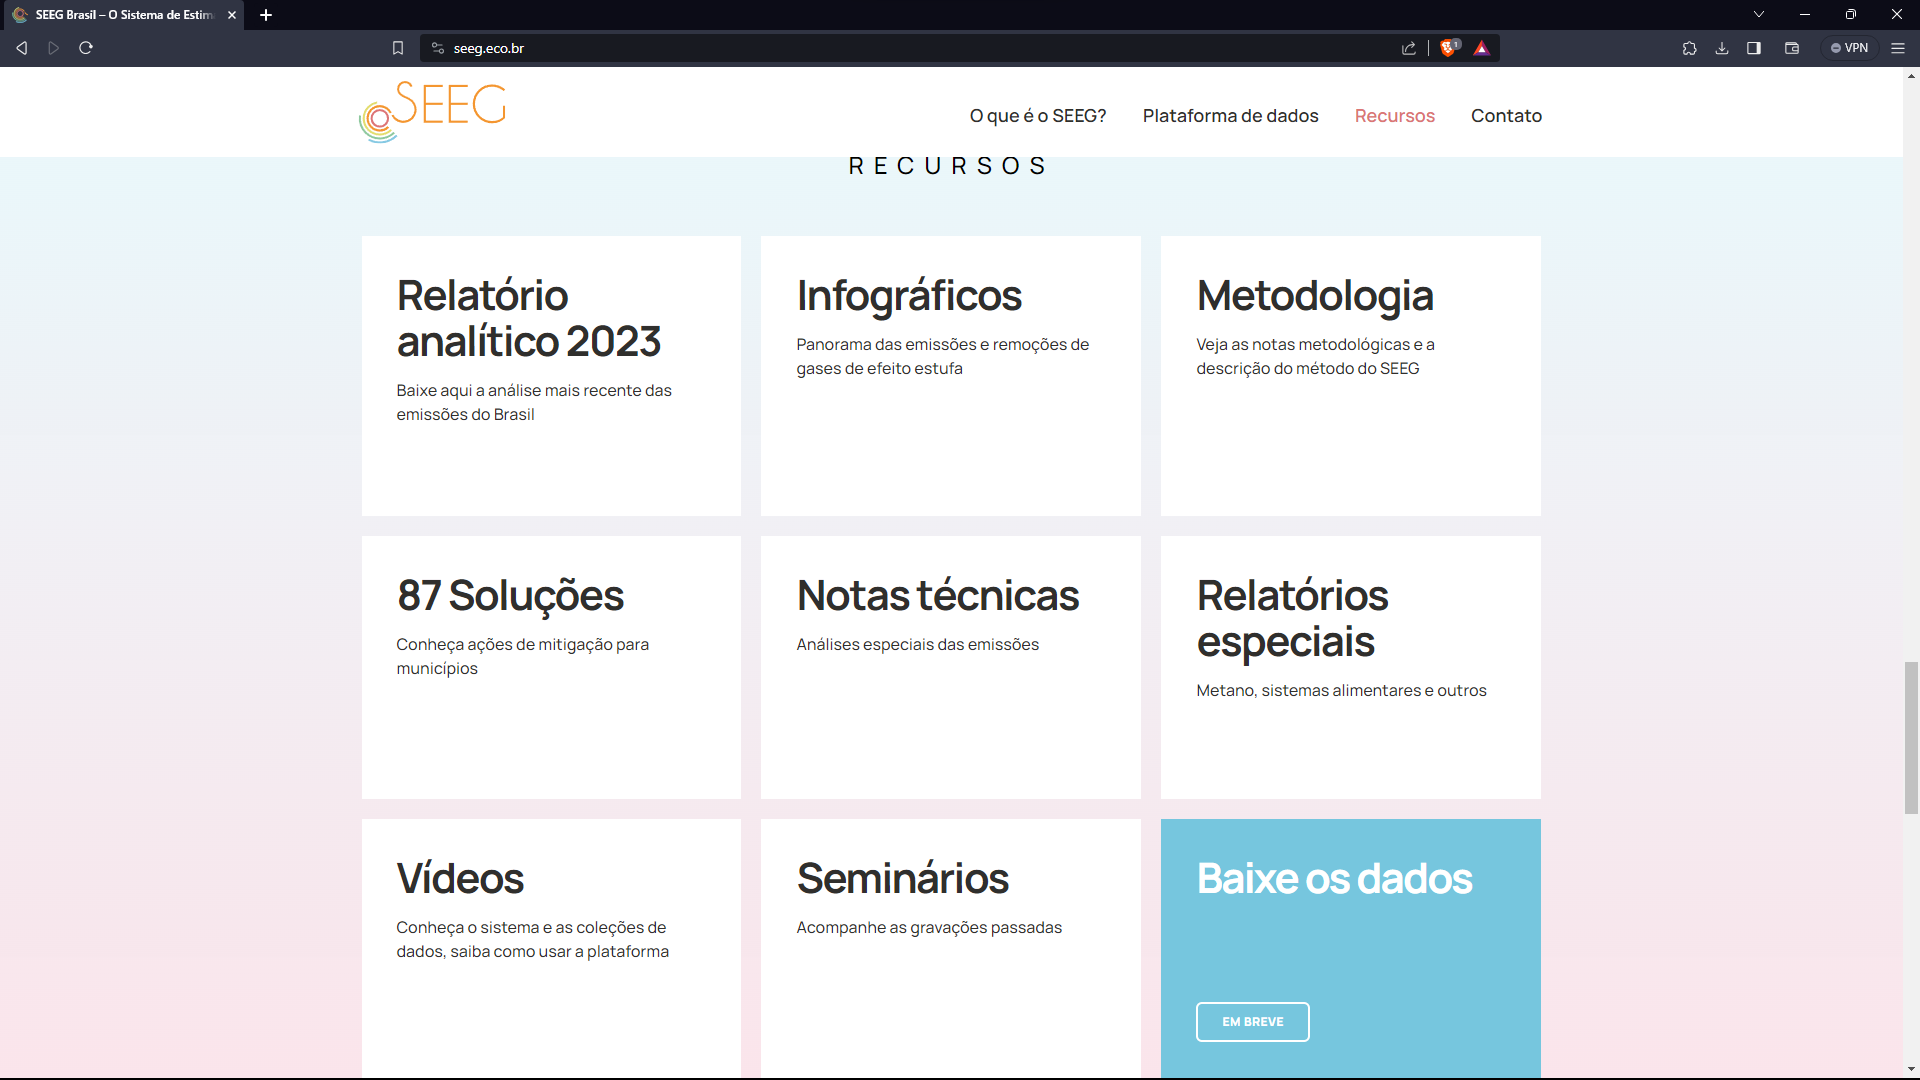

Dentro do arquivo utilizado (1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE), foi selecionada a aba "GEE Brasil", que inclui apresentação de emissão/remoção/bunker de GEEs de cada respectiva atividade dentro do território nacional e, visando adicionar ao conhecimento trazido em relatório apreseentado pelo [SEEG - Relatório 2023](https://seeg.eco.br/wp-content/uploads/2023/11/SEEG_gases_estufa_2023_v2-1.pdf), delimitam-se os objetivos:

### **Objetivos principais**
**- 1. Apresentar as principais atividades emissoras de GEEs de acordo com a série histórica encontrada**

**- 2. Calcular a representatividade das principais atividades perante o total de emissões de GEEs de cada ano e do período total e sua evolução**

### **Objetivos segundários**

**- a. Verificar a integridade e possíveis incongruências dos/nos dados**

**- b. (I) Identificar as principais atividades emissoras, (II) sua respectiva evolução no período e (III) realizar sua comparação visando observar qual atividade apresentou melhor evolução no período**


### **Informações sobre os atributos**

A base de dados utilizada quantifica a emissão, redução e reserva(*bunker*) de Gases de Efeito Estufa(GEEs) para os principais dados de atividade utilizados nos cálculo das estimativas de emissões do SEEG nos níveis nacional e regional, sendo apenas o nacional explorado neste trabalho.

1_Especificação do setor ao qual o GEE em questão faz relação. Dividido entre "Processos Industriais", "Energia", "Mudança de Uso da Terra e Florestas", "Agropecuparia" e "Resíduos". Tipo de atributo: *string*;

2-6_Especificação da atividade ao qual o GEE faz relação, apresentada abaixo, disponível na fonte dos dados ([SEEG](https://seeg.eco.br/)). Tipo de atributo: *string*;


7_Emissao_Remocao_Bunker - Classificação à  qual o GEE se refere entre "Emissão", "Remoção", "Emissão NCl", "Remoção NCl" e Bunker. Tipo de atributo: *string*;

8_GEE a que se faz referência. Tipo de atributo: *string*;

9_Nome da atividade econômica referência do GEE apresentado. Tipo de atributo: *string*;

10_Produto vinculado ao GEE. Tipo de atributo: *strinh*;

11-63_Valor de emissão/remoção/bunker relacionado ao GEE para o respectivo ano apresentado (1970 a 2021). Tido de atributo: *float64*

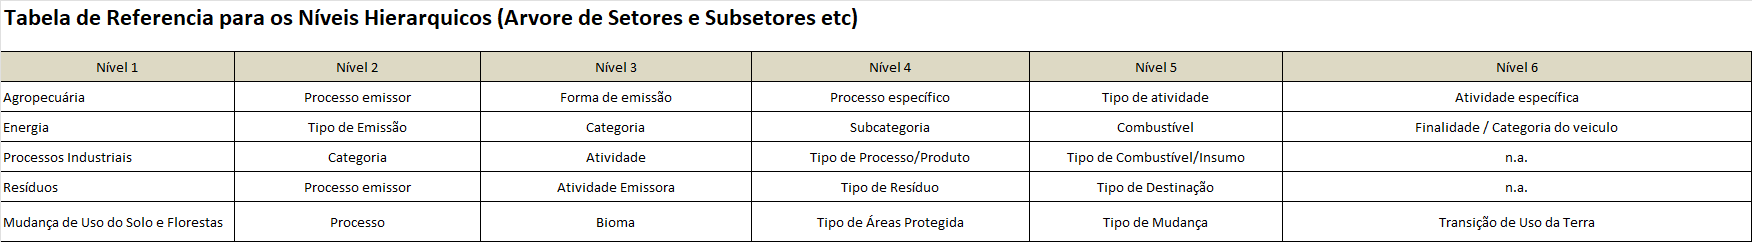

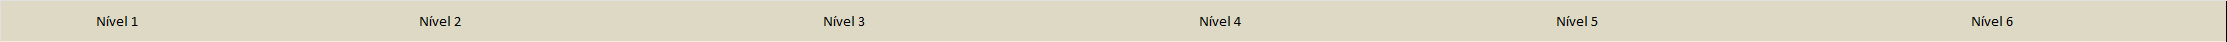
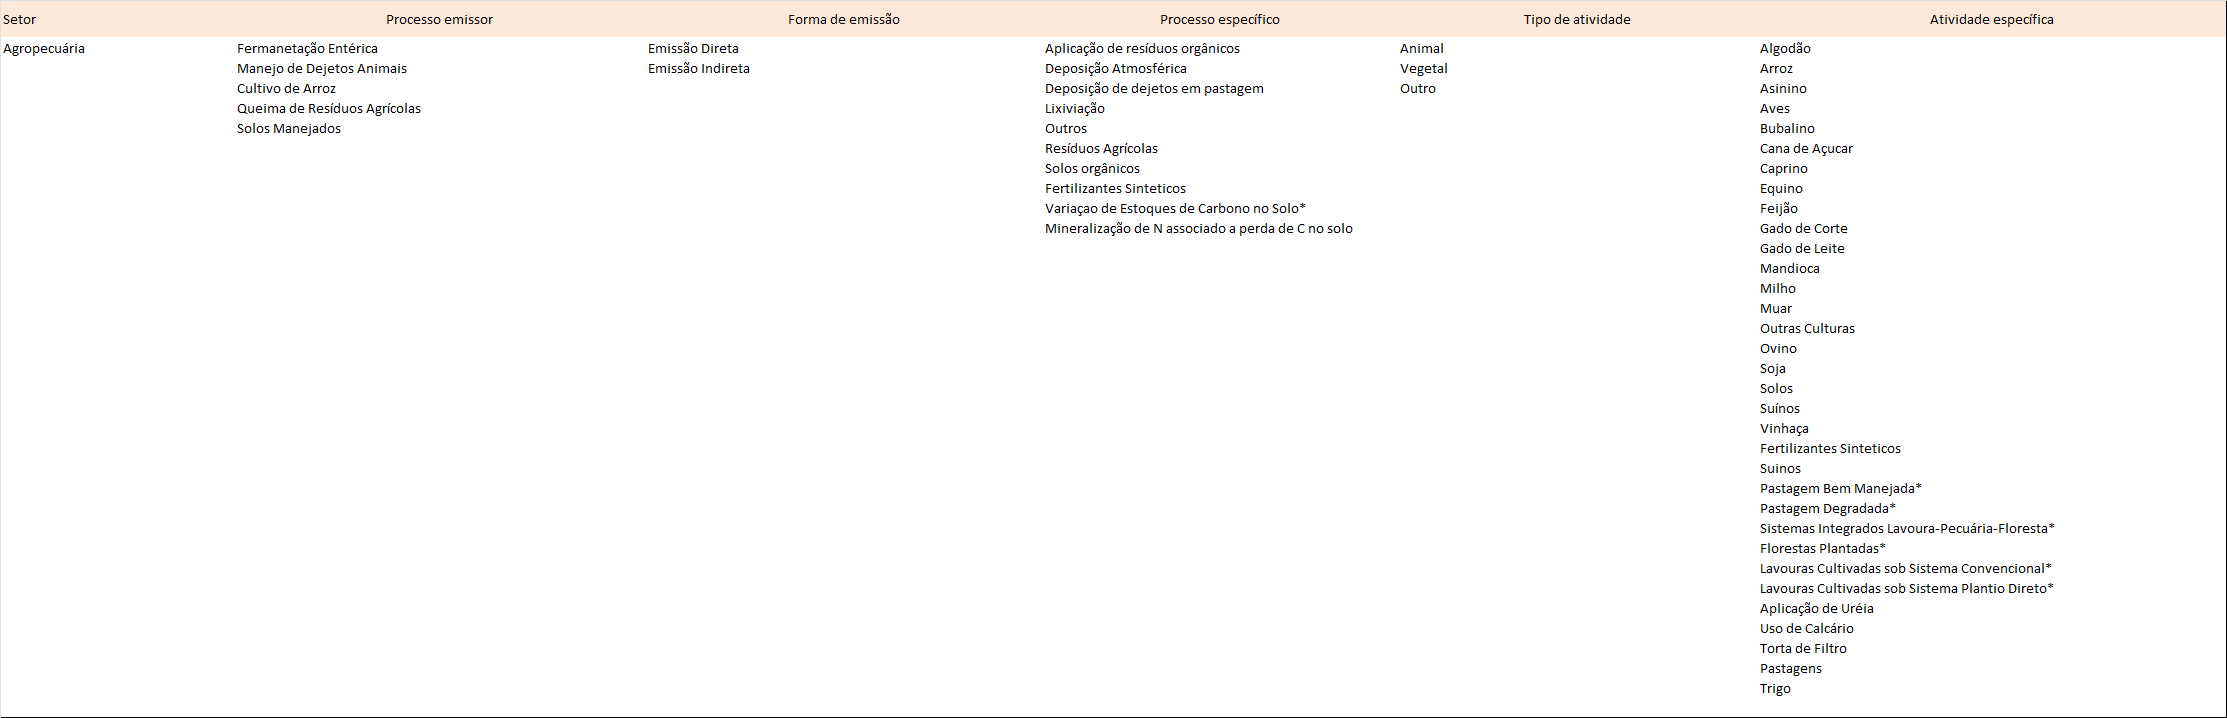

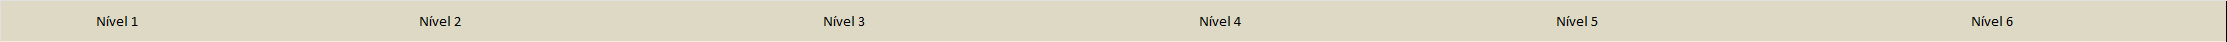
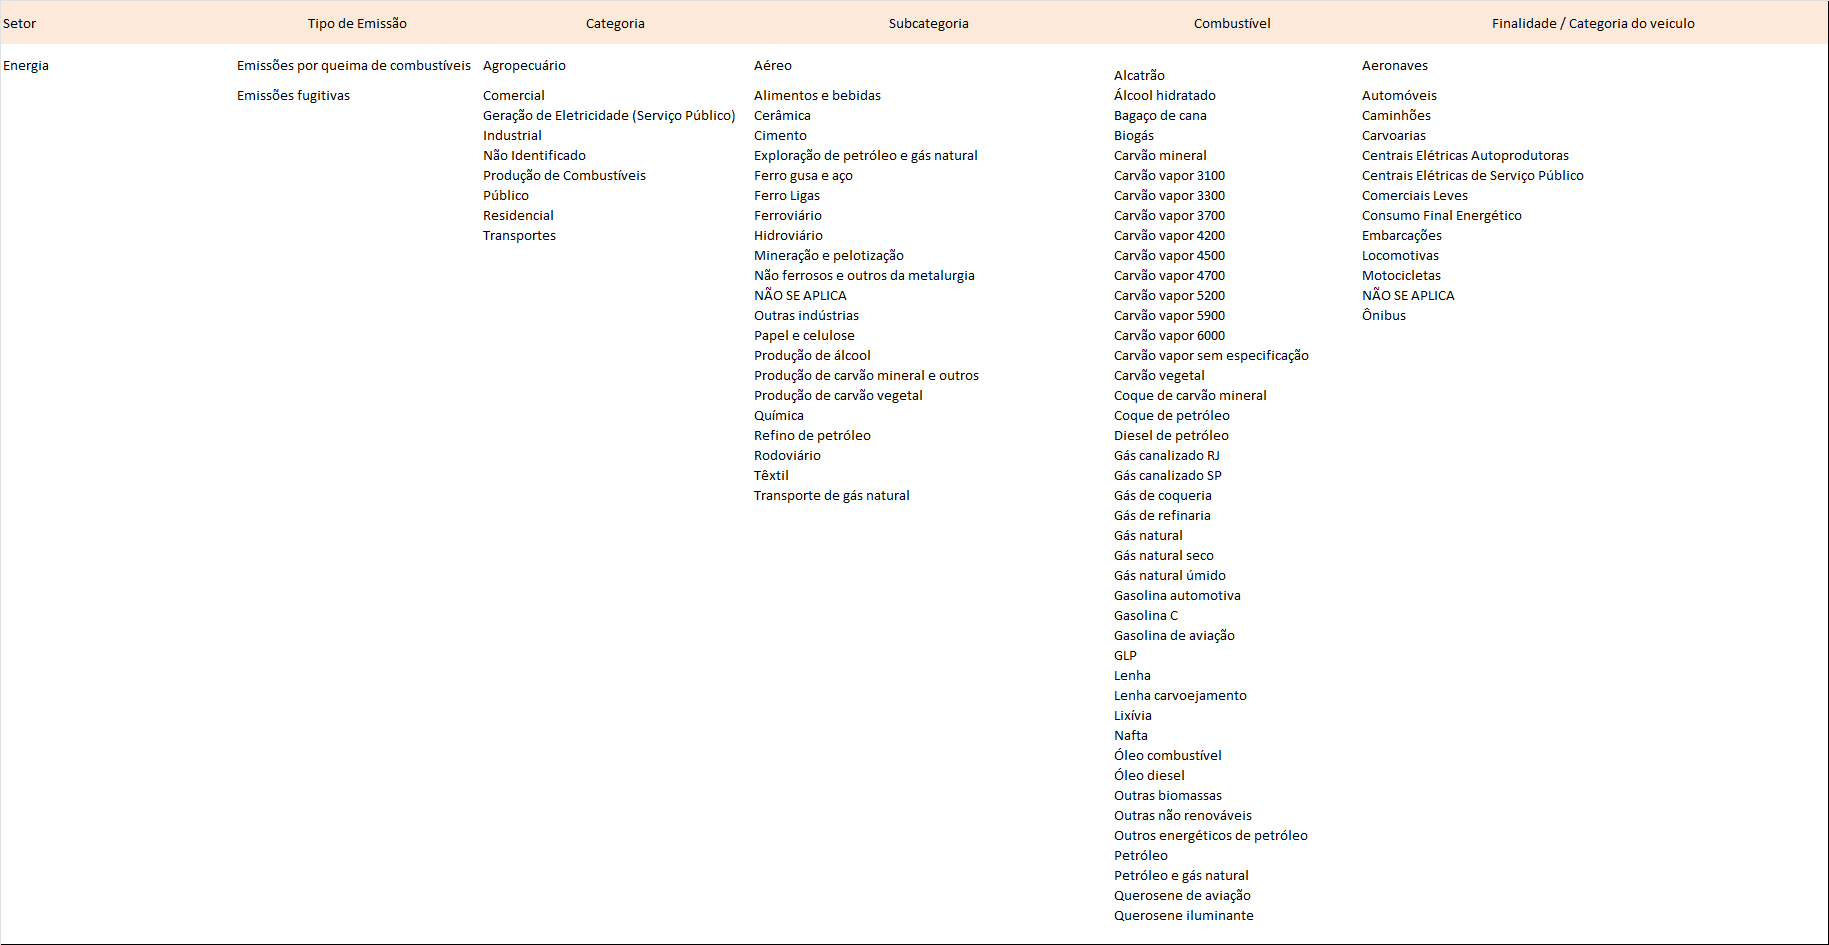

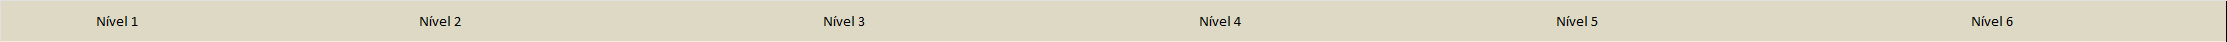
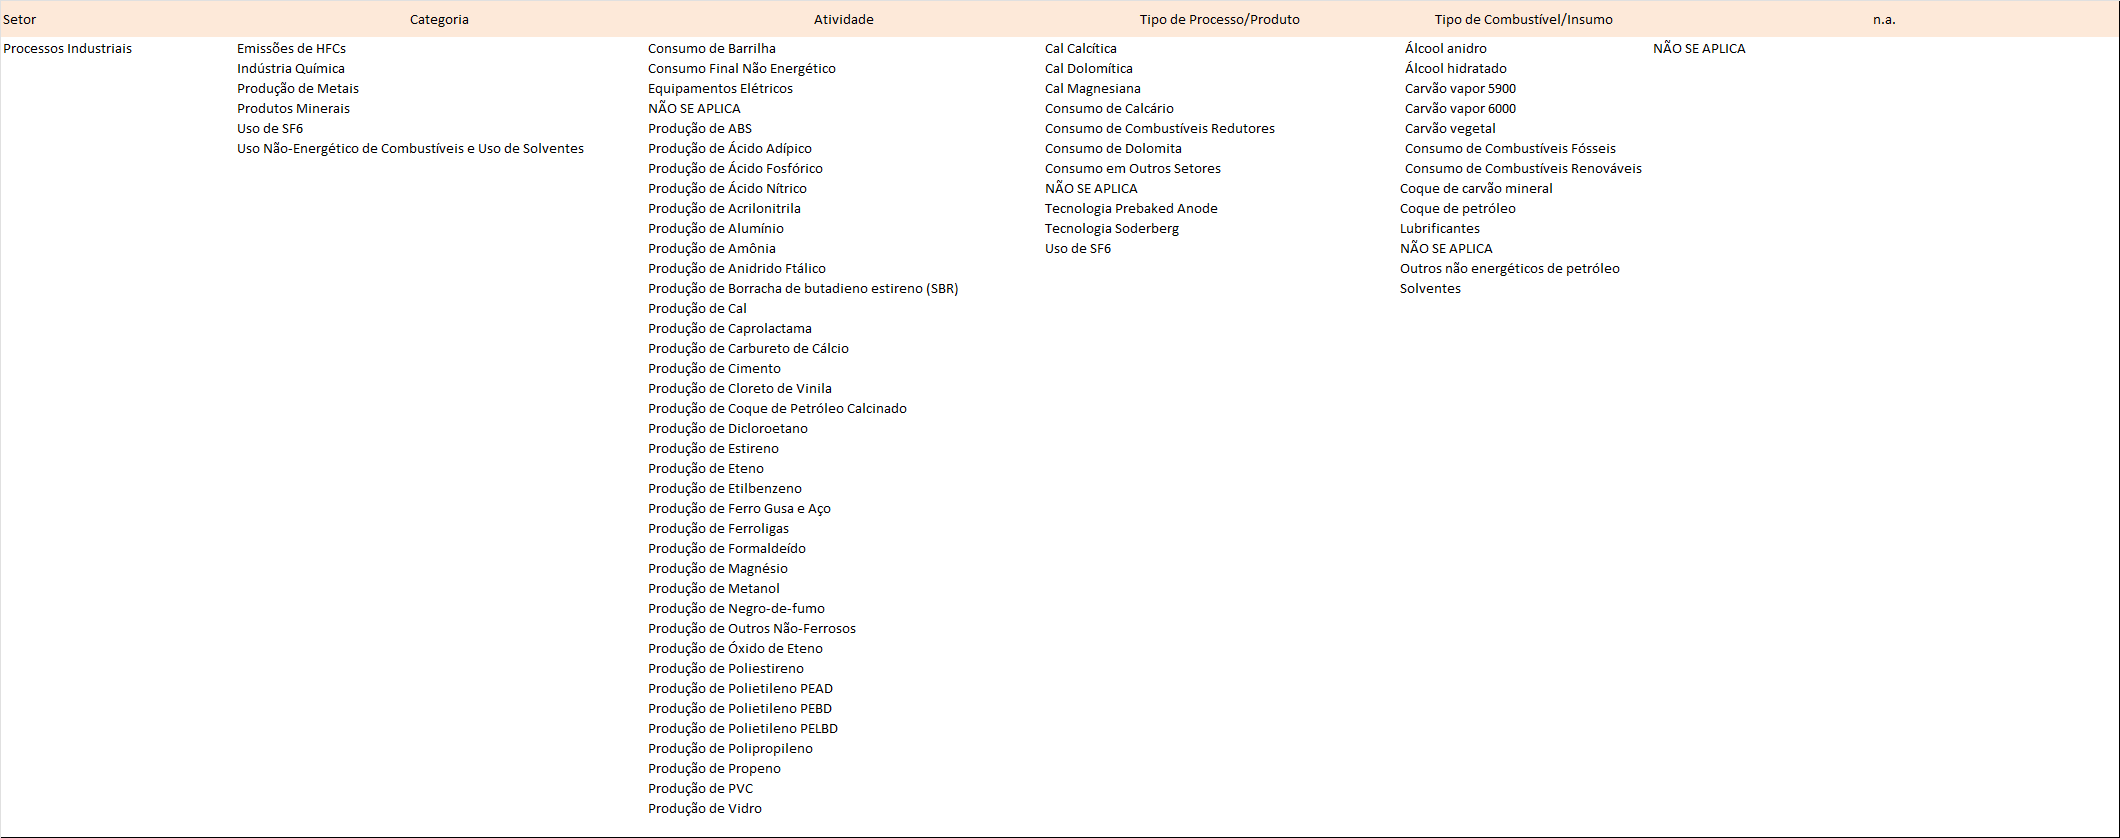

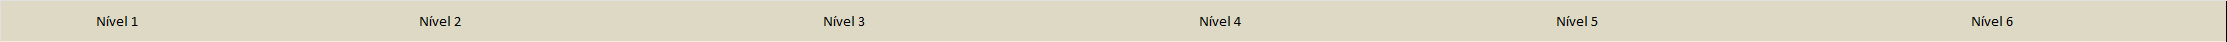
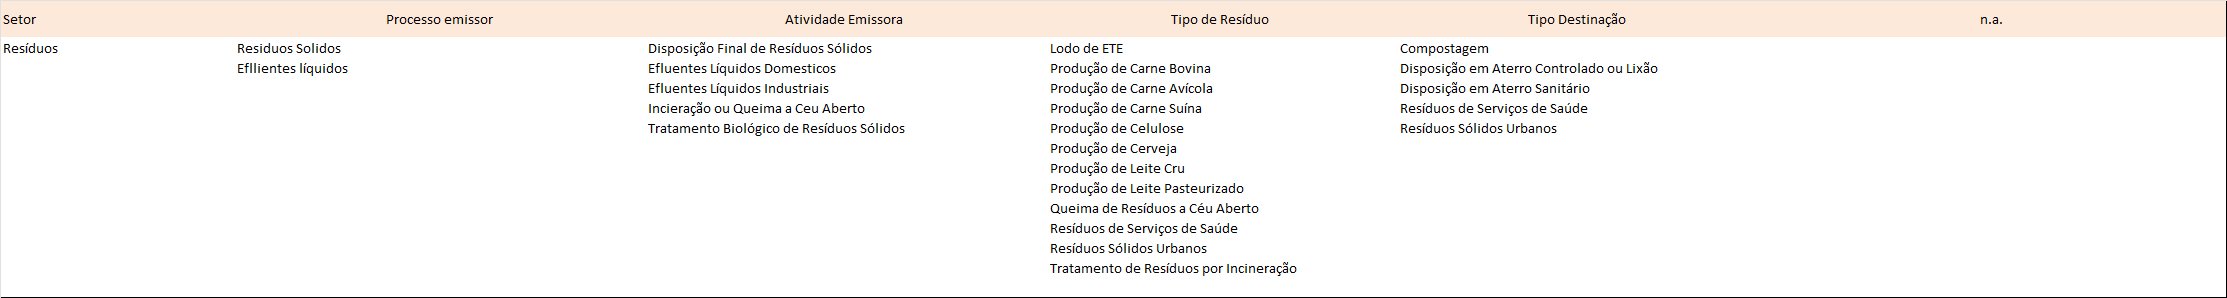

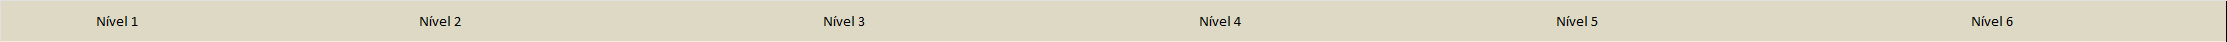
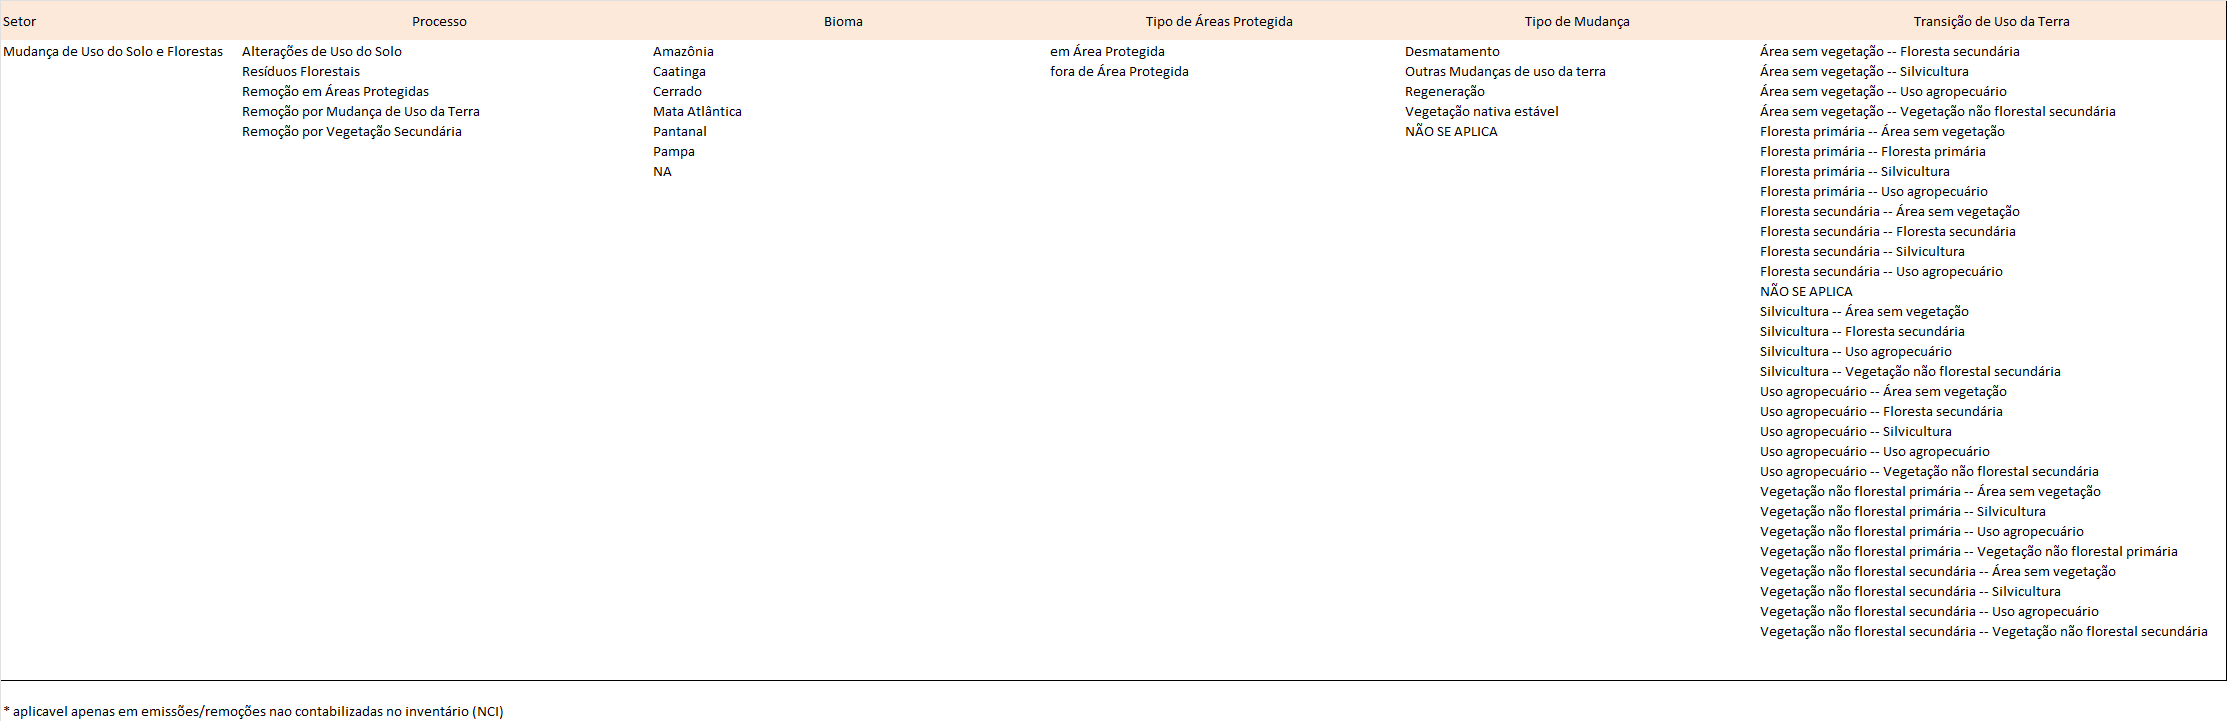


Abaixo, se importa as bibliotecas a serem utilizadas nos códigos:



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## 2. Carga de dados


Dados presentes na tabela previamente mencionada foram normalizados, sendo  realizada em alguns pontos:

(I) retirando acendos de vogais (Exs.: ã, ê, í, õ, ú) e as substituindo pelas respectivas vogais a, e, i, o, u;

(II) substituindo "ç" por "c";

(III) substituindo " " (espaços) por "_";

(IV) adicionanado "Ano" aos valores representativos de cada ano com dados apresentados.

Após normalização, o arquivo .xlsx foi transformado em .csv e o dataset foi inserido em repositório do GitHub, informado abaixo.


In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Guest1537/AD-BP_mvp/60f24837c7001d44e673ea82091d50239fa3f9bb/GEEBR_norm"

# Informa o cabeçalho das colunas
colunas = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'EmissaoReducaoBunker', 'Gas', 'Território', 'AtividadeEconomica',
           'Produto', 'Ano1970', 'Ano1971', 'Ano1972', 'Ano1973', 'Ano1974', 'Ano1975', 'Ano1976', 'Ano1977', 'Ano1978', 'Ano1979',
           'Ano1980', 'Ano1981', 'Ano1982', 'Ano1983', 'Ano1984', 'Ano1985', 'Ano1986', 'Ano1987', 'Ano1988', 'Ano1989', 'Ano1990',
           'Ano1991', 'Ano1992', 'Ano1993', 'Ano1994', 'Ano1995', 'Ano1996', 'Ano1997', 'Ano1998', 'Ano1999', 'Ano2000', 'Ano2001',
           'Ano2002', 'Ano2003', 'Ano2004', 'Ano2005', 'Ano2006', 'Ano2007', 'Ano2008', 'Ano2009', 'Ano2010', 'Ano2011', 'Ano2012',
           'Ano2013', 'Ano2014', 'Ano2015', 'Ano2016', 'Ano2017', 'Ano2018', 'Ano2019', 'Ano2020', 'Ano2021']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [53]:
# Apresenta as 5 primeiras linhas do dataset recém importado

dataset.head()

,N1,N2,N3,N4,N5,N6,EmissaoReducaoBunker,Gas,Território,AtividadeEconomica,...,Ano2012,Ano2013,Ano2014,Ano2015,Ano2016,Ano2017,Ano2018,Ano2019,Ano2020,Ano2021
0,Processos_Industriais,Industria_Quimica,Producao_de_Amonia,NaN,NaN,NaN,Emissao,CO2_t,BR,OUTRA_IND,...,1.758390e+06,1.804864e+06,1.985664e+06,1.985664e+06,1.985664e+06,1.985664e+06,1.985664e+06,1.985664e+06,1.985664e+06,1.985664e+06
1,Processos_Industriais,Industria_Quimica,Producao_de_Carbureto_de_Calcio,NaN,NaN,NaN,Emissao,CO2_t,BR,OUTRA_IND,...,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04
2,Processos_Industriais,Industria_Quimica,Producao_de_Metanol,NaN,NaN,NaN,Emissao,CO2_t,BR,OUTRA_IND,...,4.462395e+04,3.078021e+04,2.142146e+04,2.142146e+04,2.142146e+04,2.142146e+04,2.142146e+04,2.142146e+04,2.142146e+04,2.142146e+04
3,Processos_Industriais,Industria_Quimica,Producao_de_Eteno,NaN,NaN,NaN,Emissao,CO2_t,BR,OUTRA_IND,...,5.518349e+03,5.868717e+03,5.633925e+03,5.633925e+03,5.633925e+03,5.633925e+03,5.633925e+03,5.633925e+03,5.633925e+03,5.633925e+03
4,Processos_Industriais,Industria_Quimica,Producao_de_Cloreto_de_Vinila,NaN,NaN,NaN,Emissao,CO2_t,BR,OUTRA_IND,...,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05,2.058630e+05


## 3. Análise de dados

### 3.1. Estatístícas descritivas


In [38]:
# Apresenta dimensão do dataset (linhas X colunas)

print(dataset.shape)

(11283, 63)


In [ ]:
# Apresenta informações das colunas do dataset

print(dataset.info())

In [ ]:
# Mostra as 10 primeiras linhas do dataset

dataset.head(10)

In [ ]:
# Mostra as 10 últimas linhas do dataset

dataset.tail(10)

In [ ]:
# Mostra os tipos de dado de cada atributo

dataset.dtypes

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)

dataset.describe()

In [4]:
# Conta cada aparição única de dados diferentes em 'AtividadeEconomica'
ContaAE = dataset.groupby('AtividadeEconomica').size()

# Calcula o total de aparições dos dados
total_count = ContaAE.sum()

# Apresenta a representatividade para cada 'AtividadeEconomica'
print("\nContagem e representatividade por Atividade Econômica:")
for atividade, count in ContaAE.items():
    percentage = (count / total_count) * 100
    print(f"{atividade}")
    print(f"  {count} - {percentage:.2f}%")

# Apresenta o total de aparições de 'AtividadeEconomica'
print("\nTotal:", total_count)


Contagem e representatividade por Atividade Econômica:
AGR
  339 - 3.07%
AGROPEC
  3067 - 27.74%
CIM
  368 - 3.33%
COM
  151 - 1.37%
ENE_ELET
  1999 - 18.08%
HFC
  14 - 0.13%
MET
  830 - 7.51%
OUTRA_IND
  2392 - 21.64%
PEC
  526 - 4.76%
PROD_COMB
  584 - 5.28%
PUB
  165 - 1.49%
RES
  96 - 0.87%
SANEAMENTO
  86 - 0.78%
TRAN_CARGA
  241 - 2.18%
TRAN_PASS
  197 - 1.78%

Total: 11055


Observa-se como já foi idenficada incongruência nos dados, tendo em vista que o total de linhas do dataset é de 11283 e o total de aparições de "AtividadeEconomica" foi apenas de 11055.

### 3.2. Visualizações unimodais

Devido ao tamanho da

In [11]:
# Estabelece-se uma variável com nome da lista das colunas

col = list(dataset.columns)

# Seleciona apenas as colunas correspondentes aos anos
colunas_anos = col[11:]

# Cria um novo DataFrame para armazenar os 10 maiores valores para cada coluna
top_10_por_coluna = pd.DataFrame()

# Itera sobre cada coluna correspondente aos anos
for col in colunas_anos:
    # Seleciona e apresenta os 10 maiores valores para a coluna atual
    top_10_valores = dataset.nlargest(10, col)[[col]]
    # Exibe os 10 maiores valores para cada ano
    print(top_10_valores)

    # Adiciona a coluna ao novo DataFrame
    top_10_por_coluna = pd.concat([top_10_por_coluna, top_10_valores], axis=1)

# Exibe o resultado final, contendo valores nulos que preenchem células vazias nos top10 para determinado ano
print(top_10_por_coluna)

           Ano1970
505   1.202795e+08
506   1.159838e+08
504   1.073924e+08
503   9.020964e+07
514   2.391833e+07
515   2.306411e+07
2758  2.275304e+07
2759  2.206676e+07
499   2.147849e+07
500   2.147849e+07
           Ano1971
505   1.255897e+08
506   1.211044e+08
504   1.121337e+08
503   9.419229e+07
514   2.500407e+07
515   2.411107e+07
2758  2.273862e+07
499   2.242674e+07
500   2.242674e+07
513   2.232507e+07
           Ano1972
505   1.309034e+08
506   1.262282e+08
504   1.168780e+08
503   9.817751e+07
514   2.608649e+07
515   2.515483e+07
499   2.337560e+07
500   2.337560e+07
513   2.329151e+07
7814  2.279553e+07
           Ano1973
505   1.362156e+08
506   1.313507e+08
504   1.216211e+08
503   1.021617e+08
514   2.716918e+07
7814  2.692967e+07
7812  2.684397e+07
7811  2.672449e+07
7810  2.654905e+07
515   2.619885e+07
           Ano1974
505   1.416780e+08
506   1.366180e+08
504   1.264982e+08
503   1.062585e+08
514   2.823962e+07
7814  2.809598e+07
7812  2.800657e+07
7811  2.7881

In [6]:
# Seleciona apenas as colunas correspondentes aos anos
colunas_anos = dataset.iloc[:, 10:]

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='D

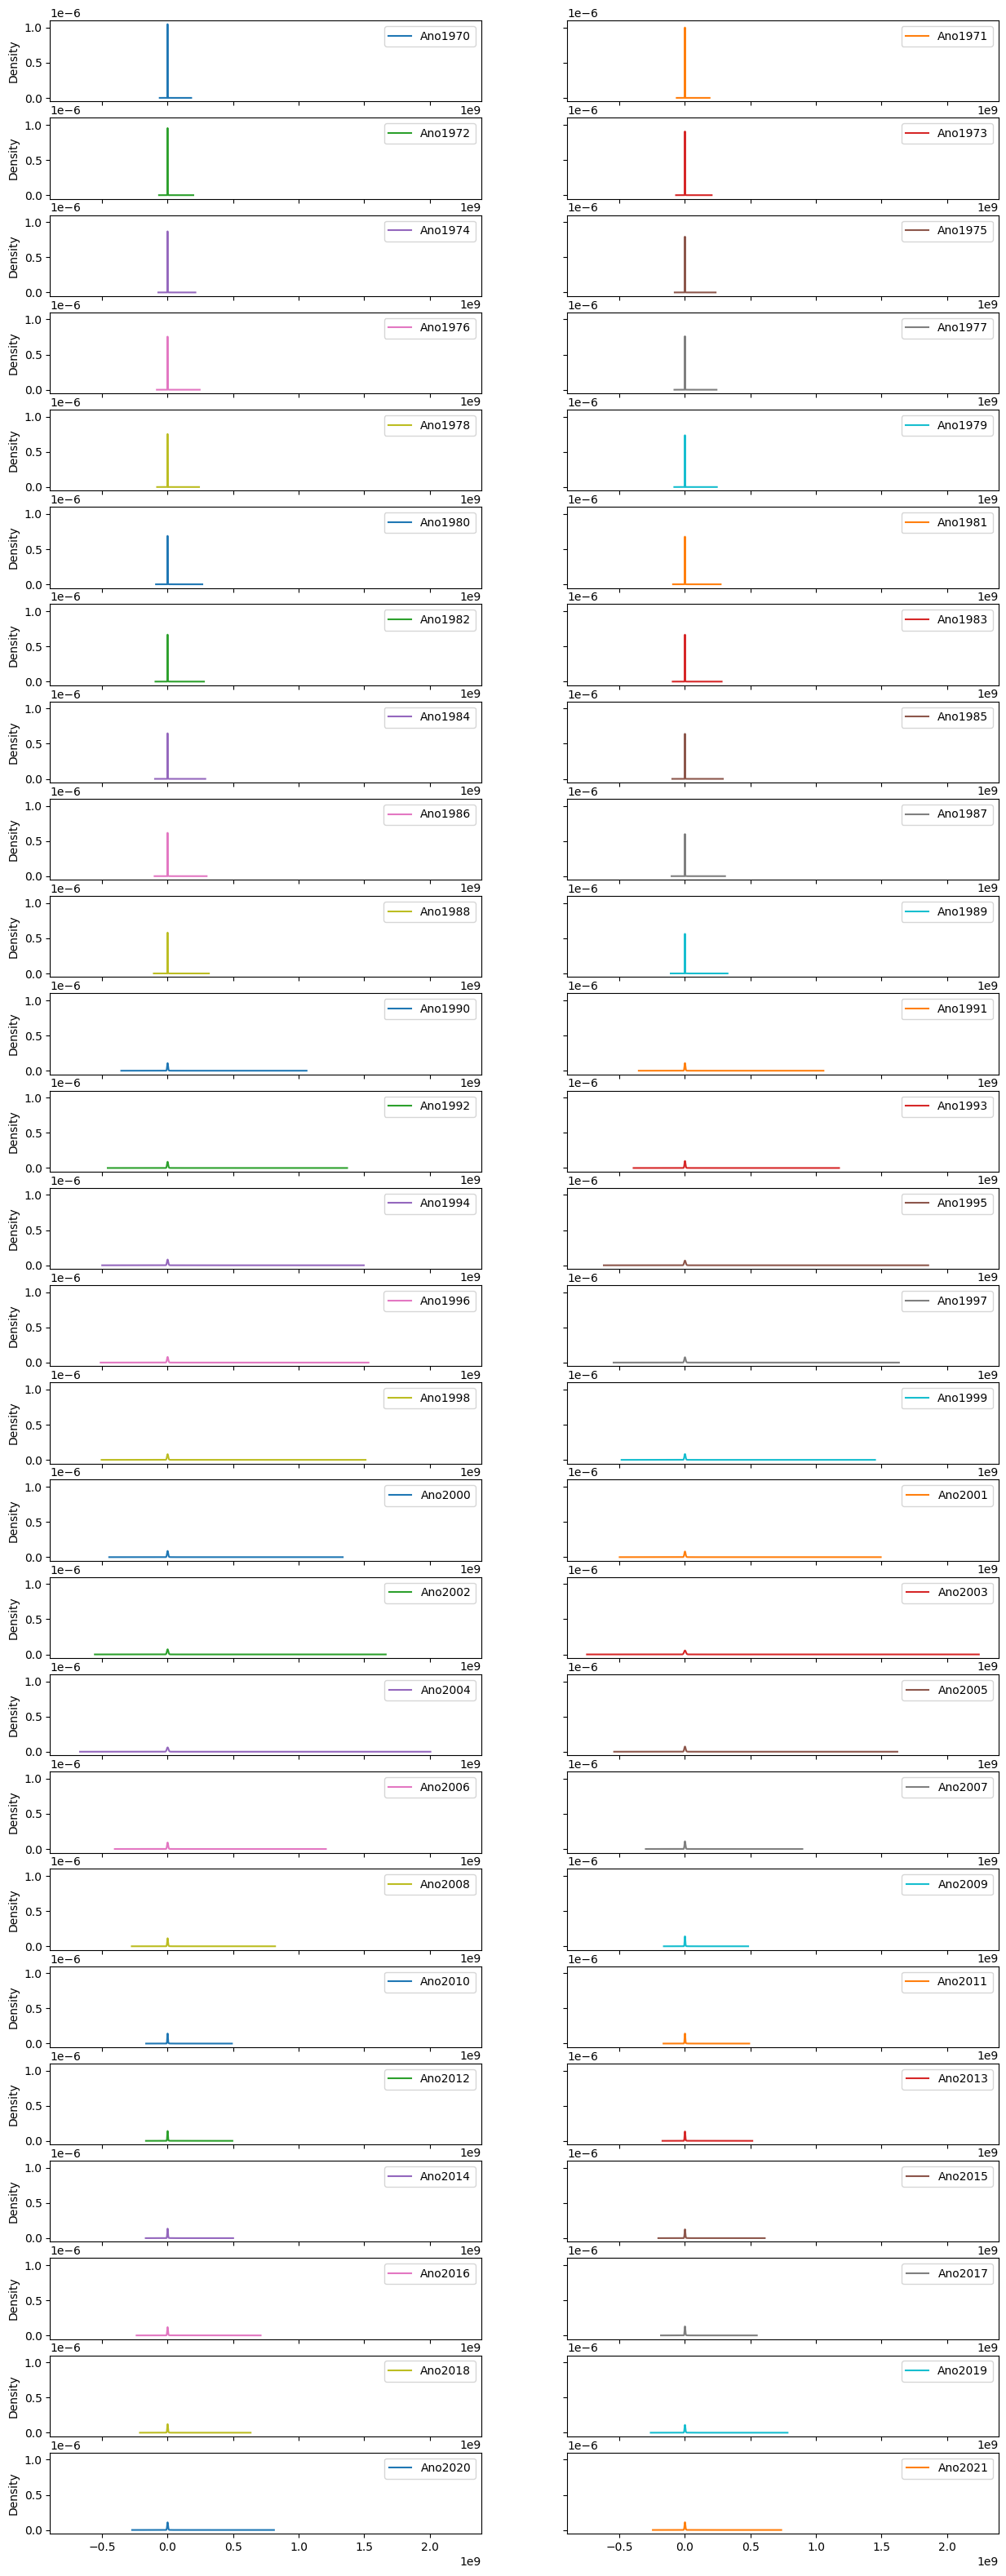

In [7]:
# Density Plot 1 - registros de dados em cada ano (Todos os dados)
colunas_anos.plot(kind = 'density', subplots = True, layout = (26,2), sharex = True, sharey = True, figsize = (15,40))

De imediato se percebe a quantidade de registros '0' no dataset, representado pelo pico observado em todos os gráficos.

Verifica-se o crescimento da distribuição de dados em três etapas: entre (I) 1970 e 1989, (II) 1990 e 2003 e entre (III) 2004e 2021.

A Etapa I tendo uma grande concentração dos valores de dados apresentados e com pequena alteração em sua distribuição. Havendo as maiores quantidades de registros '0' de todos atributos.

Durante a Etapa II houve grande distribuição dos valores dos dados, com seu máximo e mínimo em 2003, apresentando grande redução na quantidade de registros '0'.

Durante a Etapa III a quantidade de regristros '0' voltou crescer, enquanto a distribuição dos valores dos dados voltou a reduzir, com leve variações.

A não definição se um registro '0' representa uma atividade *carbono zero*, impossibilita a quantificação da representatividade desses casos e impossiblita a tomada de conclusões sem viés.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='D

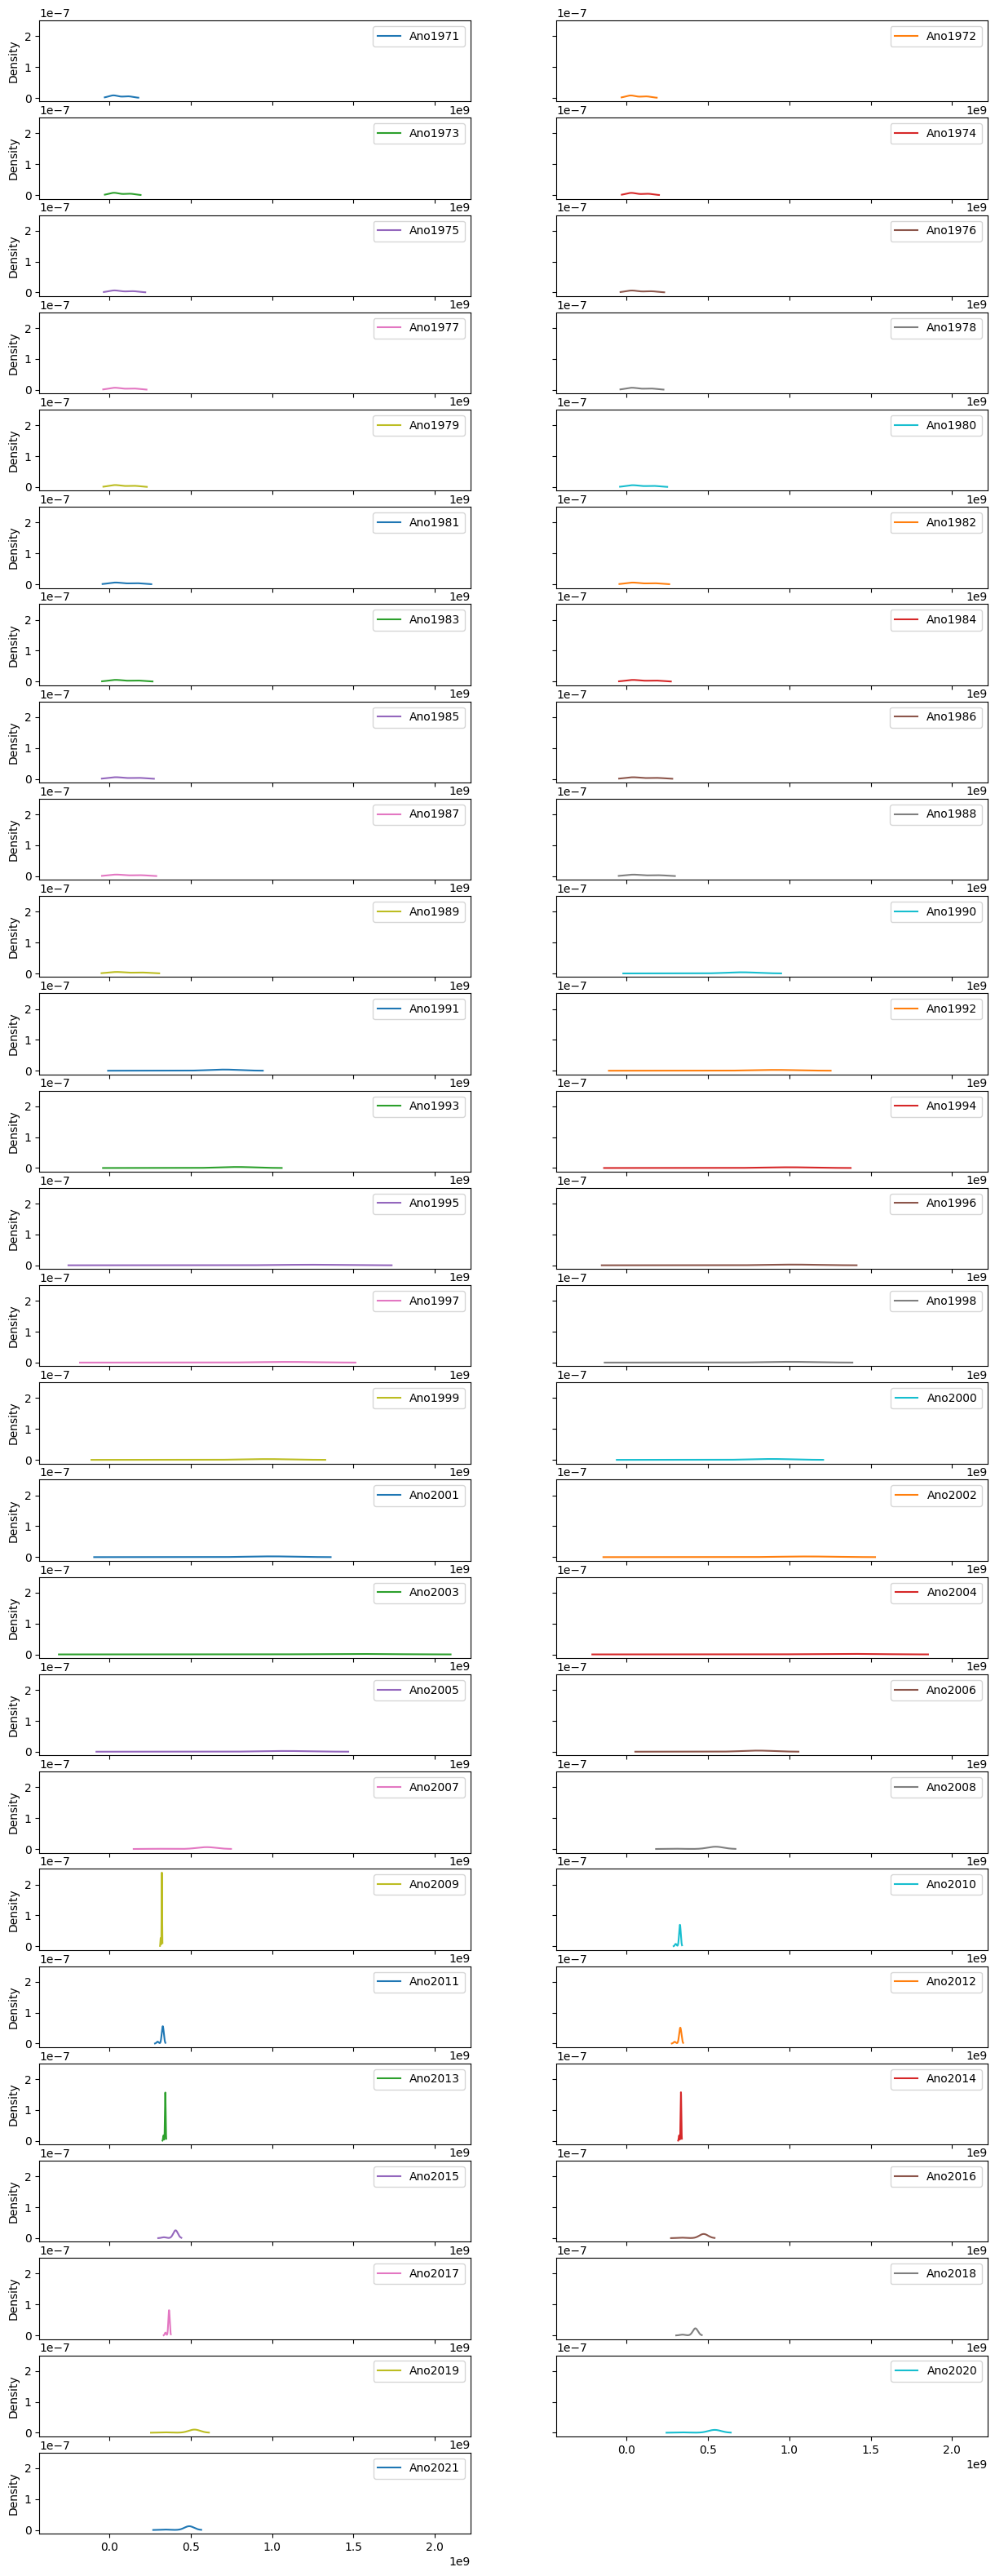

In [61]:
# Density Plot 2 - 10 maiores valores de cada ano (Apenas Top 10 dados de cada ano)

top_10_por_coluna.plot(kind = 'density', subplots = True, layout = (26,2), sharex = True, sharey = True, figsize = (15,40))

Observa-se como o maior valor de emissão de GEE foi registrado em 2004, como observado no Density Plot 1, Os anos 2007 a 2021 detém picos aparentes, com os anos 2009, 2010, 2011, 2012, 2013, 2014 e 2017 sendo os mais aparentes, parecendo indicar dados repetidos ou próximos.

In [90]:
# Apresenta-se os valores das 10 atividades mais emissoras dos anos com maiores picos

print("Valores 2009:")
print(top_10_por_coluna['Ano2009'][top_10_por_coluna['Ano2009'].notna()])

print("Valores 2013:")
print(top_10_por_coluna['Ano2013'][top_10_por_coluna['Ano2013'].notna()])

print("Valores 2014:")
print(top_10_por_coluna['Ano2014'][top_10_por_coluna['Ano2014'].notna()])

print("Valores 2017:")
print(top_10_por_coluna['Ano2017'][top_10_por_coluna['Ano2017'].notna()])

print("Valores 2010:")
print(top_10_por_coluna['Ano2010'][top_10_por_coluna['Ano2010'].notna()])


Valores 2009:
8209     321854012.0
8210     321854012.0
8211     321854012.0
8212     321854012.0
8213     321854012.0
8214     321854012.0
8215     321854012.0
8216     321854012.0
8217     321854012.0
10194    314315001.0
Name: Ano2009, dtype: float64
Valores 2013:
8209     342984294.0
8210     342984294.0
8211     342984294.0
8212     342984294.0
8213     342984294.0
8214     342984294.0
8215     342984294.0
8216     342984294.0
8217     342984294.0
10194    331485038.0
Name: Ano2013, dtype: float64
Valores 2014:
8209     322305848.0
10194    333733539.0
10195    333733539.0
10196    333733539.0
10197    333733539.0
10198    333733539.0
10199    333733539.0
10200    333733539.0
10201    333733539.0
10202    333733539.0
Name: Ano2014, dtype: float64
Valores 2017:
8209     365940855.0
8210     365940855.0
8211     365940855.0
8212     365940855.0
8213     365940855.0
8214     365940855.0
8215     365940855.0
8216     365940855.0
8217     365940855.0
10194    343935613.0
Name: Ano2017,

Observa-se repetição dos dados em todos os 5 casos.

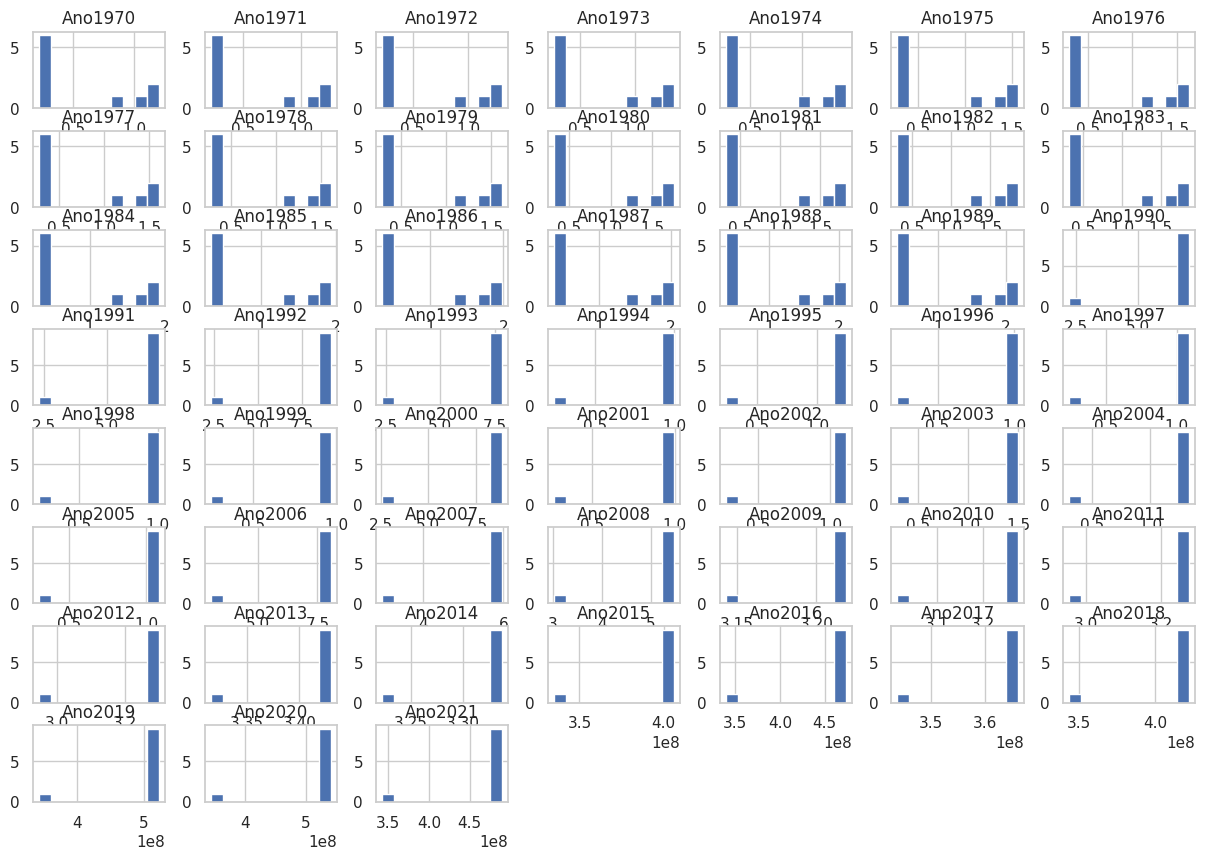

In [91]:
# ADICIONAR EXPLICAÇÃO DO CÓDIGO/GRÁFICO
# HISTOGRAMA

top_10_por_coluna.hist(figsize = (15,10))
plt.show()

Confirma-se claramente a repetição de dados olhando-se o histograma.

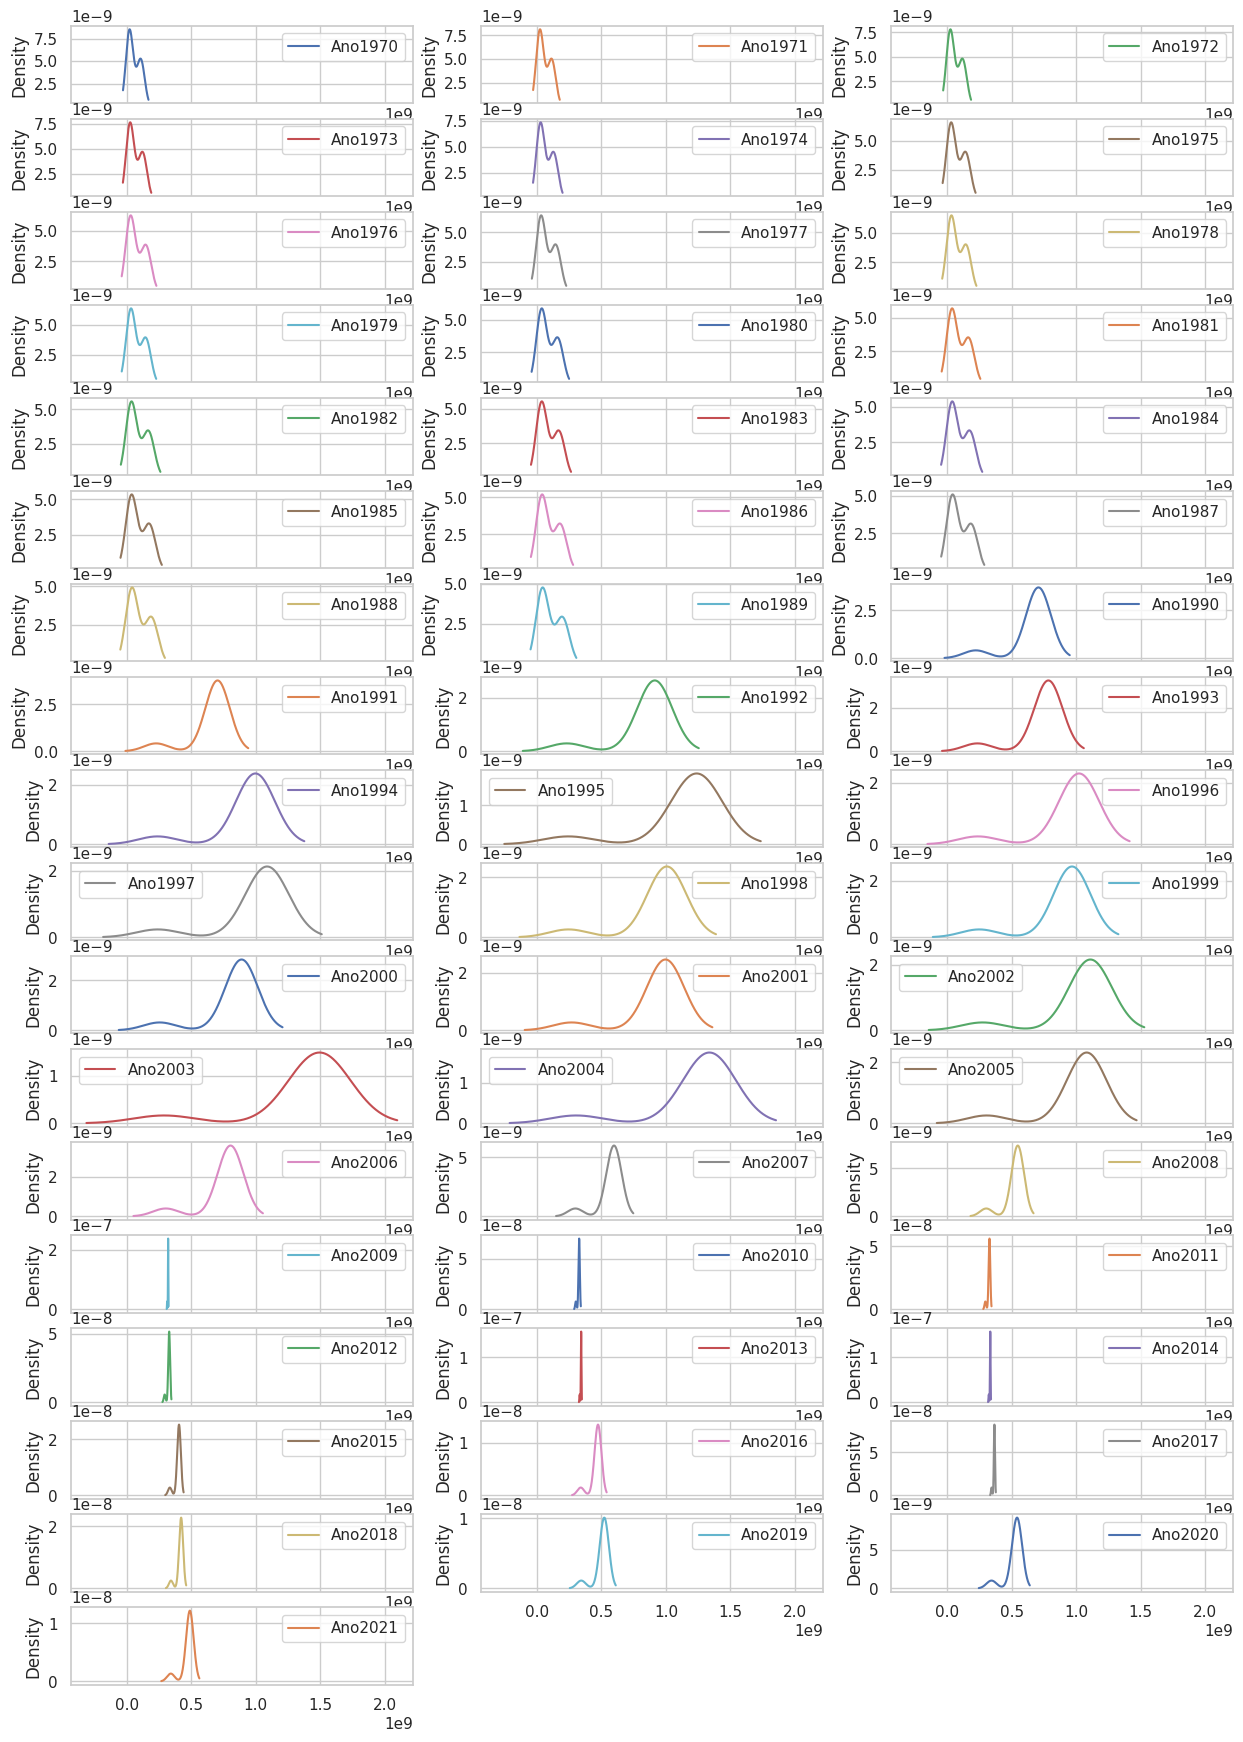

In [98]:
# RODANDO, MAS APRESENTAÇÃO INCONCLUSIVA, REFAZER COM OUTRA AMOSTRA
# ADICIONAR EXPLICAÇÃO DO CÓDIGO/GRÁFICO
#DENSITY PLOT

top_10_por_coluna.plot(kind = 'density', subplots = True, layout = (25,3), sharex = True, figsize = (15,30))
plt.show()

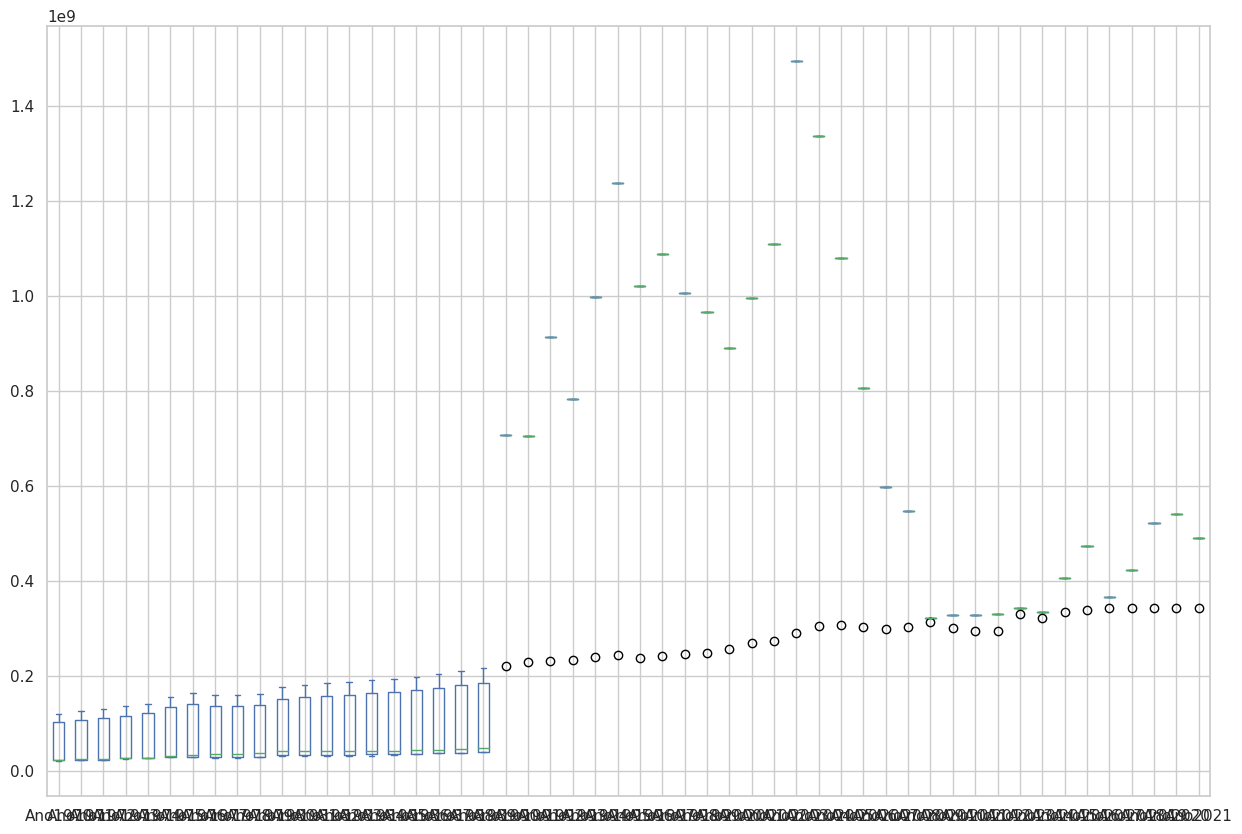

In [101]:
# RODANDO
# ADICIONAR EXPLICAÇÃO DO CÓDIGO
#BOX PLOT

# Boxplot
top_10_por_coluna.plot(kind = 'box', subplots = False, layout = (20,5), sharex = False, sharey = True, figsize = (15,10))
plt.show()

Explicação dos gráficos

### 3.3. Visualizações Multimodais

<Axes: >

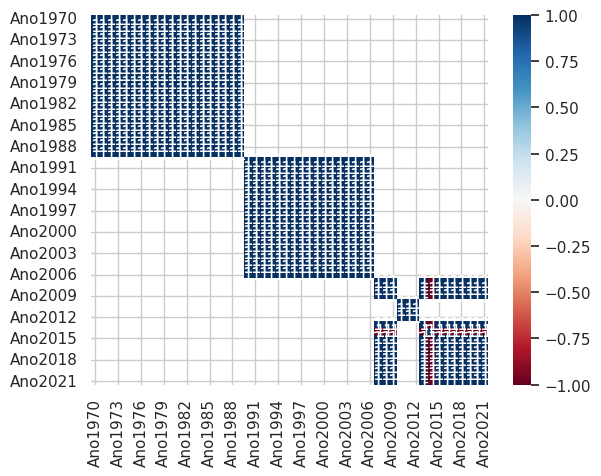

In [102]:
# RODANDO, MUITOS DADOS, REDUZIR AMOSTRA
# ADICIONAR EXPLICAÇÃO DO CÓDIGO

sns.heatmap(top_10_por_coluna.corr(), annot=True, cmap='RdBu')

In [19]:
top_10_por_coluna

,Ano1970,Ano1971,Ano1972,Ano1973,Ano1974,Ano1975,Ano1976,Ano1977,Ano1978,Ano1979,...,Ano2012,Ano2013,Ano2014,Ano2015,Ano2016,Ano2017,Ano2018,Ano2019,Ano2020,Ano2021
505,1.202795e+08,1.255897e+08,1.309034e+08,1.362156e+08,1.416780e+08,1.562657e+08,1.636468e+08,1.608285e+08,1.601617e+08,1.626115e+08,...,2.948342e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,1.159838e+08,1.211044e+08,1.262282e+08,1.313507e+08,1.366180e+08,1.506848e+08,1.578022e+08,1.550847e+08,1.544416e+08,1.568039e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,1.073924e+08,1.121337e+08,1.168780e+08,1.216211e+08,1.264982e+08,1.395230e+08,1.461132e+08,1.435969e+08,1.430015e+08,1.451888e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,9.020964e+07,9.419229e+07,9.817751e+07,1.021617e+08,1.062585e+08,1.171993e+08,1.227351e+08,1.206214e+08,1.201213e+08,1.219586e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,2.391833e+07,2.500407e+07,2.608649e+07,2.716918e+07,2.823962e+07,3.200962e+07,3.344485e+07,3.682342e+07,3.679954e+07,3.872332e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,2.306411e+07,2.411107e+07,2.515483e+07,2.619885e+07,2.723106e+07,3.086641e+07,3.225039e+07,3.550830e+07,3.548527e+07,3.734035e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2758,2.275304e+07,2.273862e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2759,2.206676e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,2.147849e+07,2.242674e+07,2.337560e+07,NaN,NaN,NaN,2.922264e+07,2.871938e+07,2.860030e+07,2.903776e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,2.147849e+07,2.242674e+07,2.337560e+07,NaN,NaN,NaN,2.922264e+07,2.871938e+07,2.860030e+07,2.903776e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(subset_df)

           Ano1990       Ano1991       Ano1992       Ano1993       Ano1994  \
505   2.216931e+08  2.288294e+08  2.314837e+08  2.345783e+08  2.399852e+08   
8209  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8210  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8211  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8212  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8213  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8214  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8215  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8216  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8217  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   

           Ano1995       Ano1996       Ano1997       Ano1998       Ano1999  \
505   2.441214e+08  2.385605e+08  2.416709e+08  2.454964e+08  2

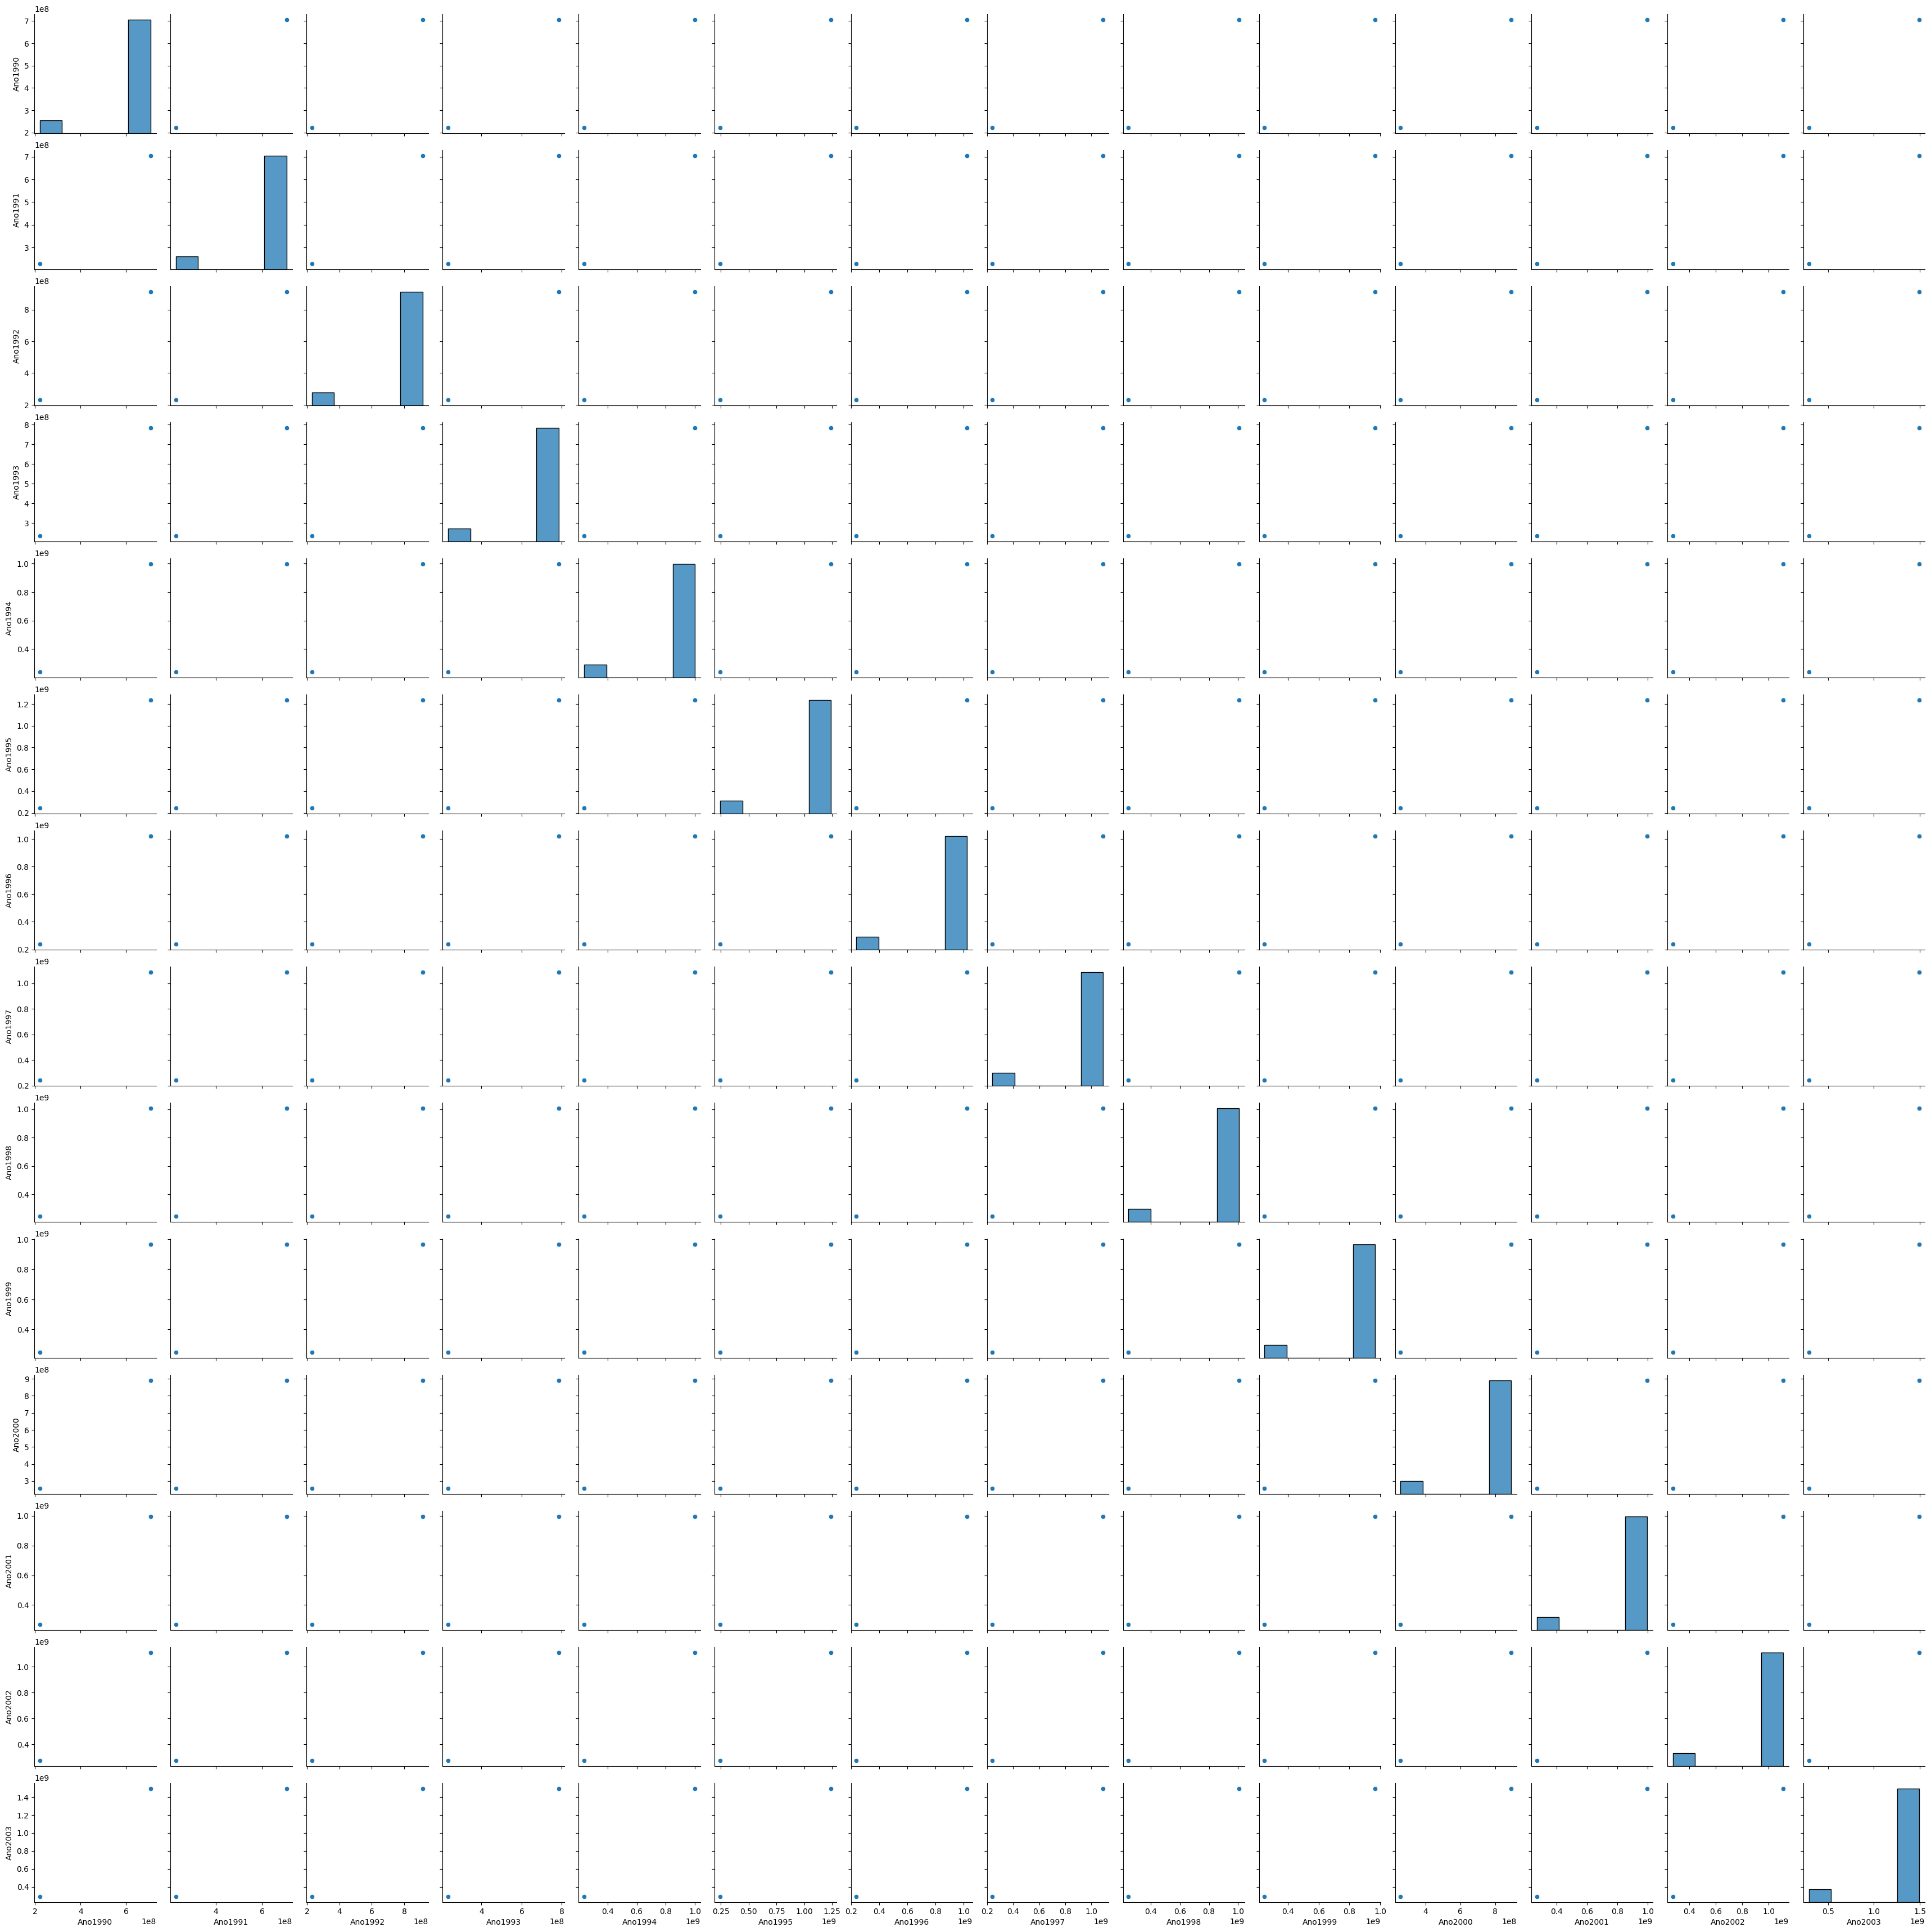

In [18]:
# Convert column names to strings if they are integers
top_10_por_coluna.columns = top_10_por_coluna.columns.astype(str)

# Create a DataFrame subset with only non-null values for 'Ano2002'
subset_df = top_10_por_coluna.iloc[:,top_10_por_coluna.columns.get_loc('Ano1990'):top_10_por_coluna.columns.get_loc('Ano2003') + 1].dropna()

# Create a pair plot for the subset
sns.pairplot(subset_df[['Ano1990', 'Ano1991', 'Ano1992', 'Ano1993', 'Ano1994', 'Ano1995', 'Ano1996', 'Ano1997', 'Ano1998', 'Ano1999', 'Ano2000', 'Ano2001', 'Ano2002', 'Ano2003']])

# Show the plot
plt.show()

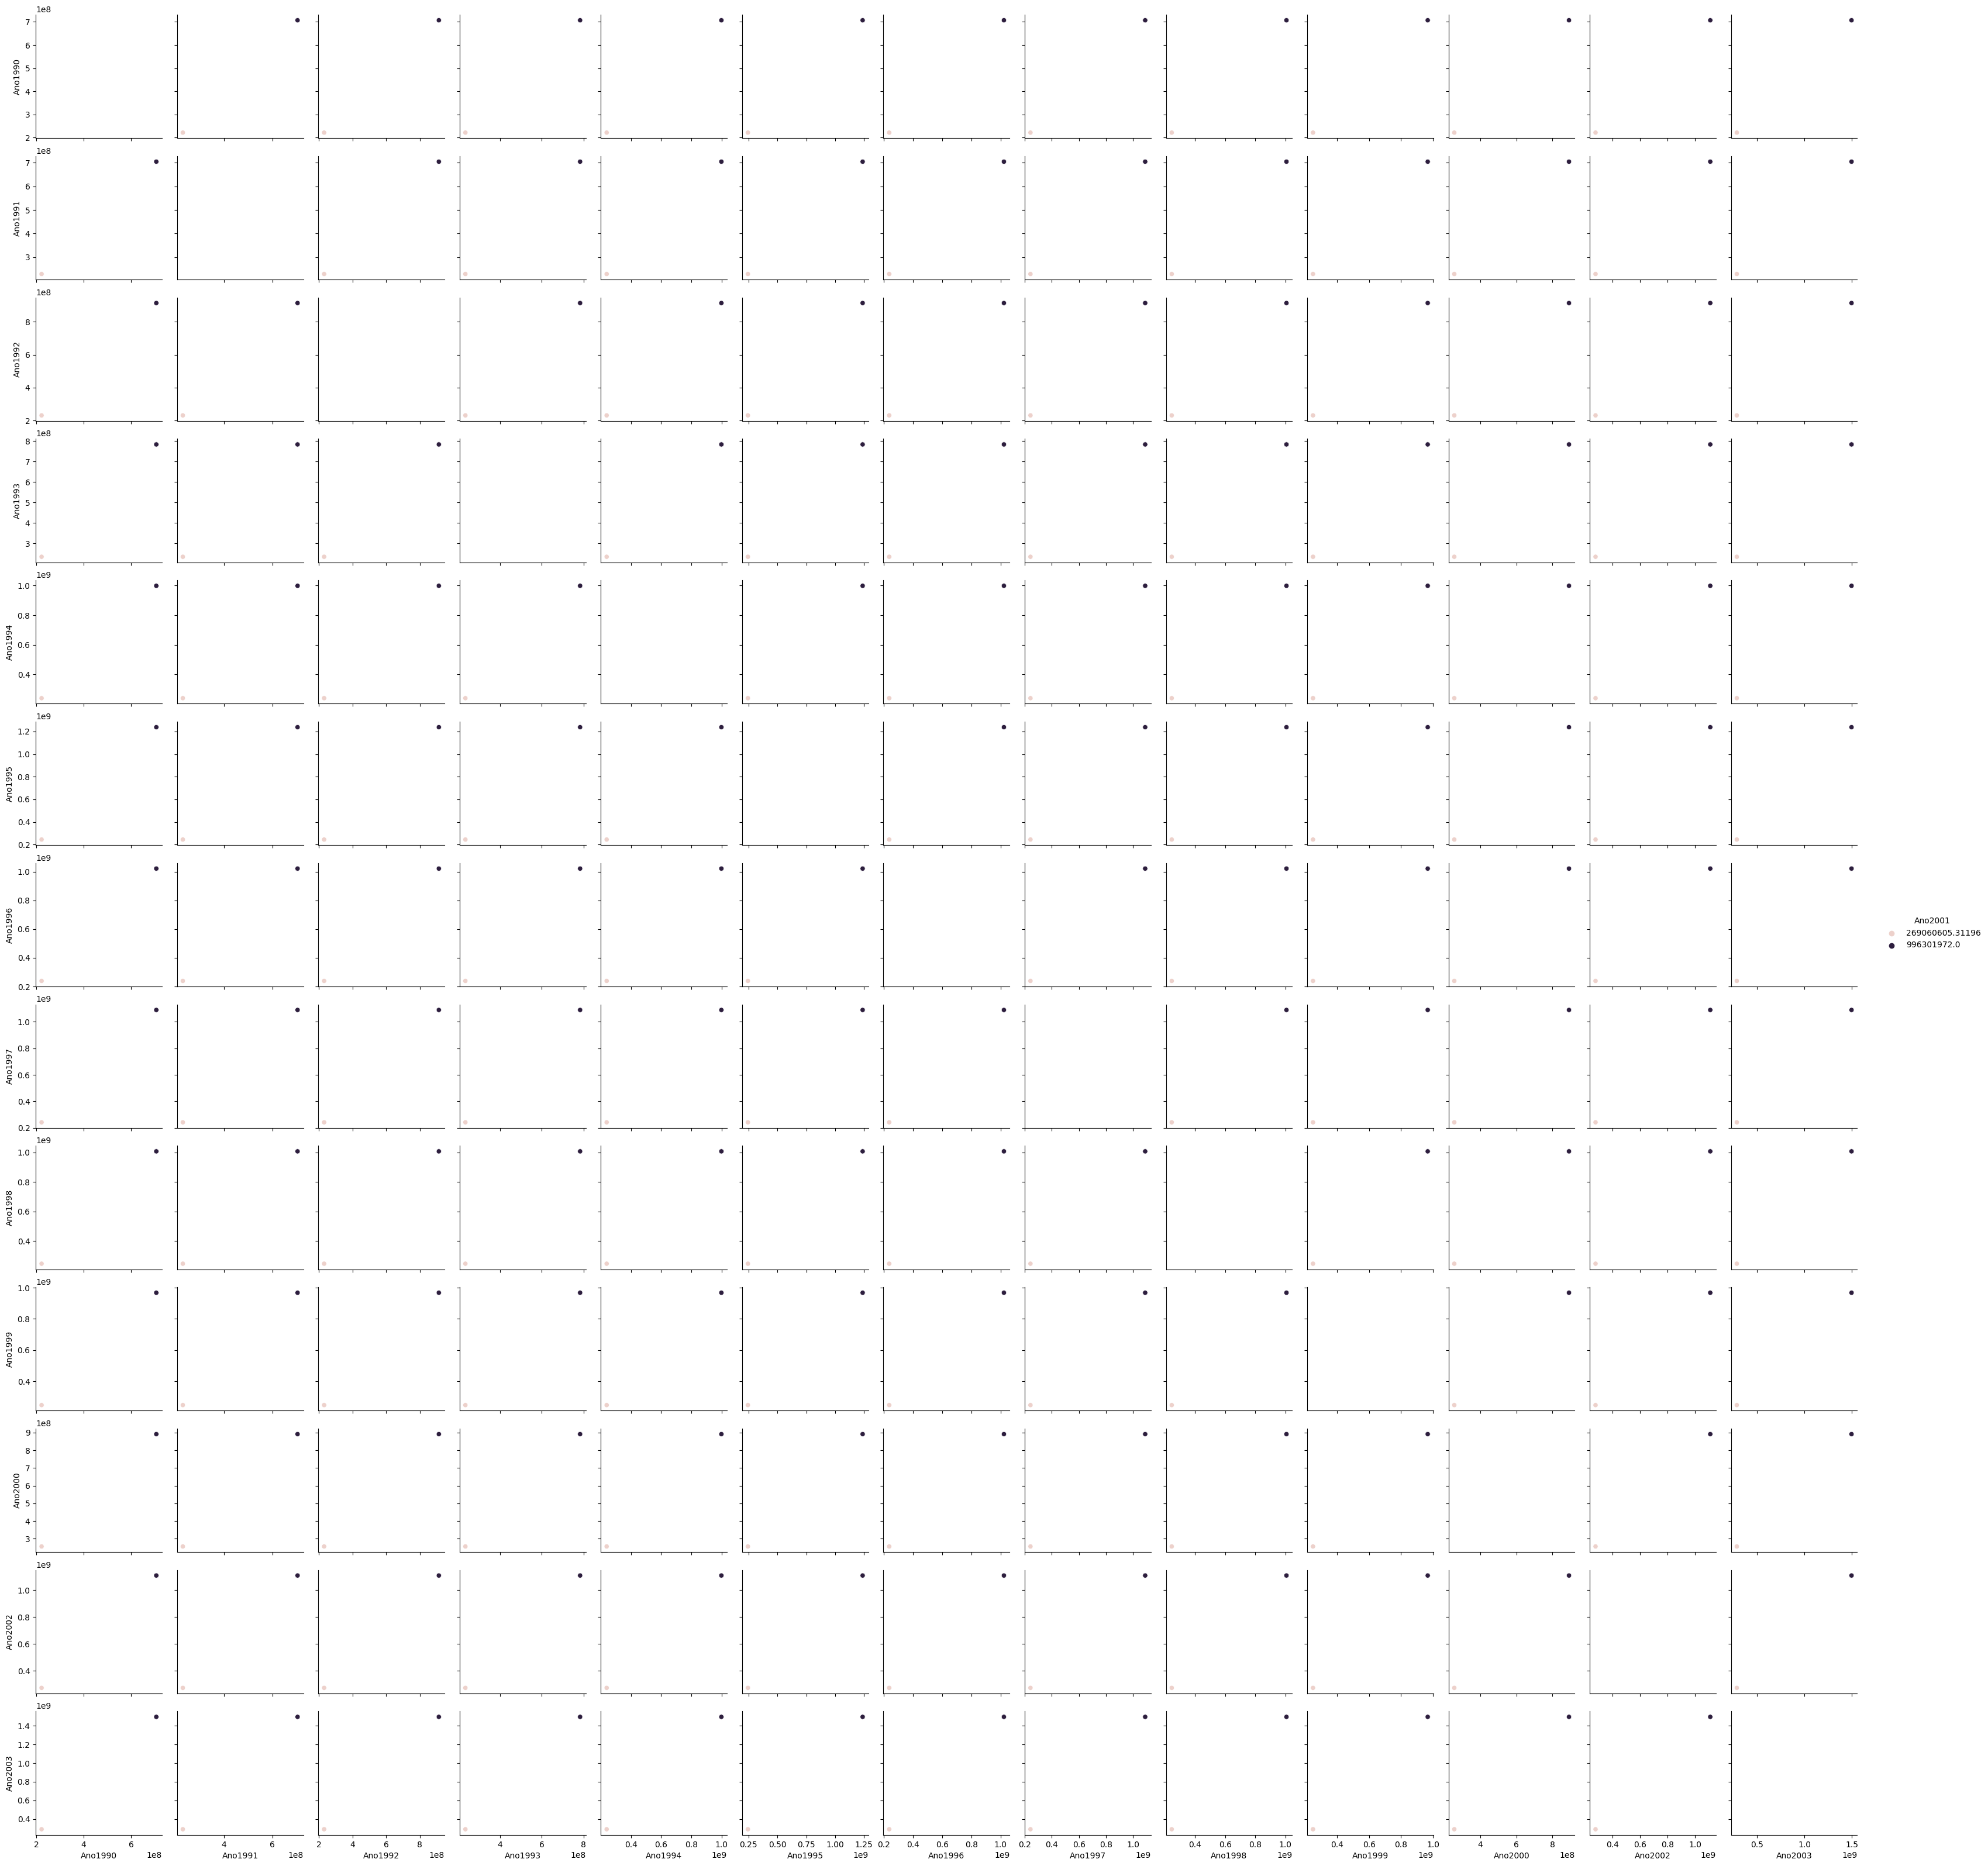

In [22]:
# FALHO
# ADICIONAR EXPLICAÇÃO DO CÓDIGO

sns.pairplot(subset_df, hue = "Ano2001", height = 2.5)

## 4. Pré-processamento de dados

### 4.1. Tratamento de *missings* e limpeza

In [26]:
# RODANDO
# ADICIONAR EXPLICAÇÃO DO CÓDIGO

top_10_por_coluna.isnull().sum()

Ano1970    27
Ano1971    27
Ano1972    27
Ano1973    27
Ano1974    27
Ano1975    27
Ano1976    27
Ano1977    27
Ano1978    27
Ano1979    27
Ano1980    27
Ano1981    27
Ano1982    27
Ano1983    27
Ano1984    27
Ano1985    27
Ano1986    27
Ano1987    27
Ano1988    27
Ano1989    27
Ano1990    27
Ano1991    27
Ano1992    27
Ano1993    27
Ano1994    27
Ano1995    27
Ano1996    27
Ano1997    27
Ano1998    27
Ano1999    27
Ano2000    27
Ano2001    27
Ano2002    27
Ano2003    27
Ano2004    27
Ano2005    27
Ano2006    27
Ano2007    27
Ano2008    27
Ano2009    27
Ano2010    27
Ano2011    27
Ano2012    27
Ano2013    27
Ano2014    27
Ano2015    27
Ano2016    27
Ano2017    27
Ano2018    27
Ano2019    27
Ano2020    27
Ano2021    27
dtype: int64

<Axes: >

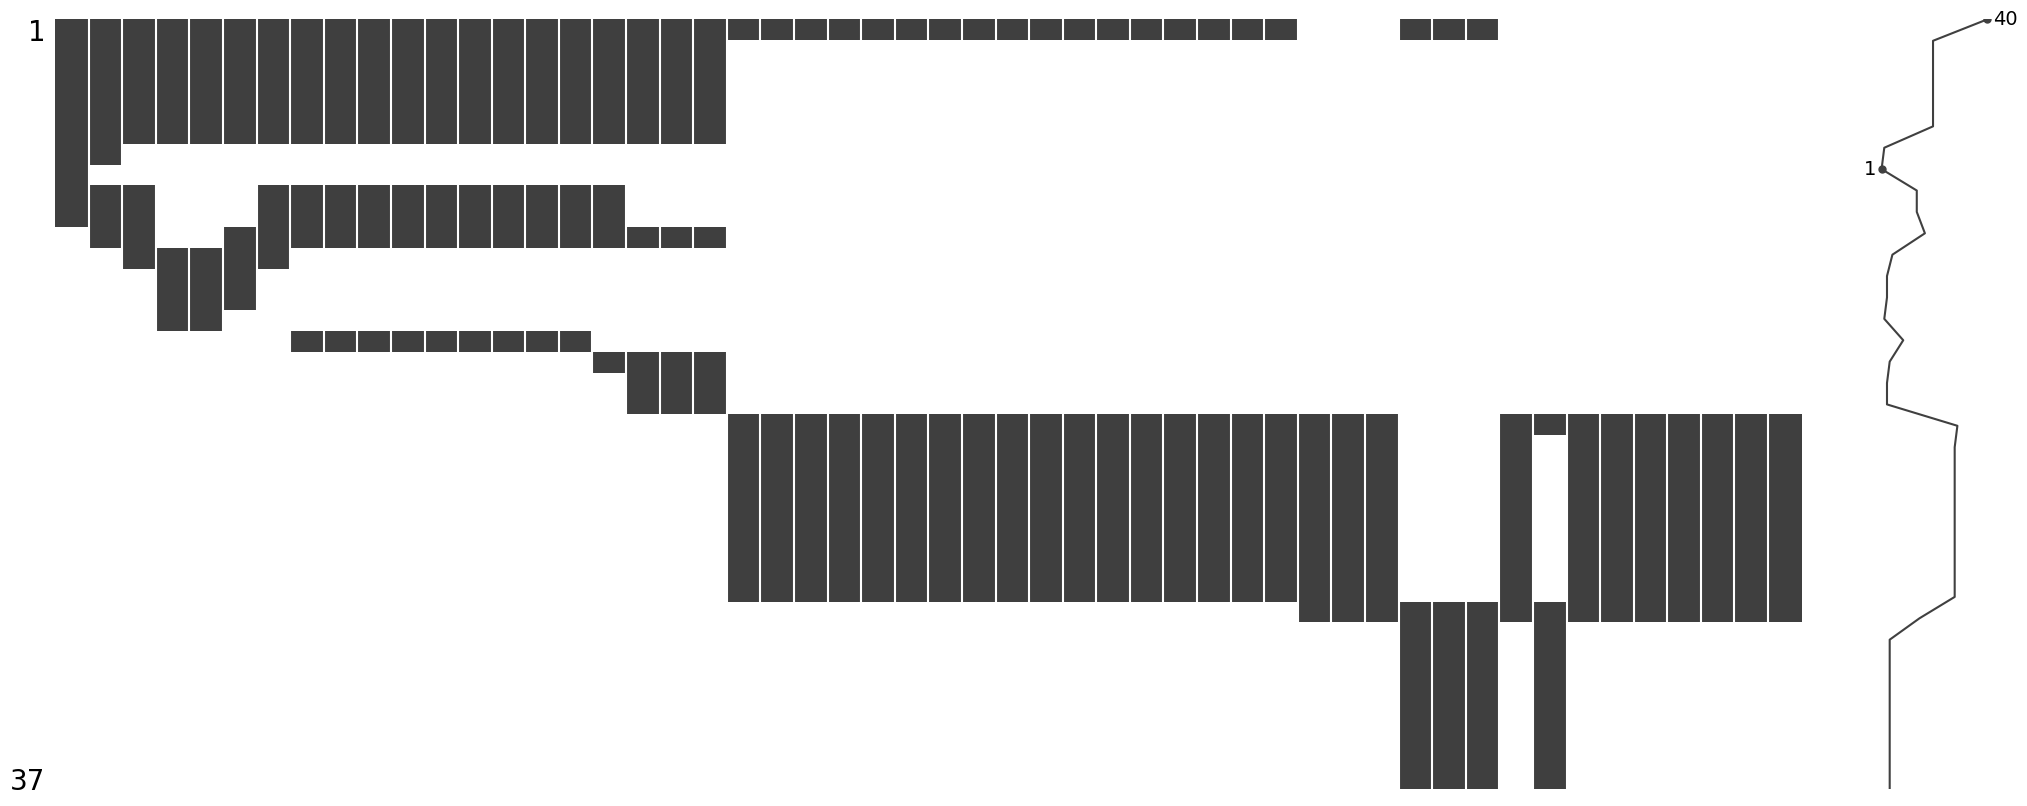

In [54]:
# RODANDO
# ADICIONAR EXPLICAÇÃO DO CÓDIGO

col = list(top_10_por_coluna.columns)
atributos = top_10_por_coluna[col[0:53]]
atributos.replace(0, np.nan, inplace=True)
ms.matrix(atributos)

In [ ]:
print(atributos.info)

<Axes: >

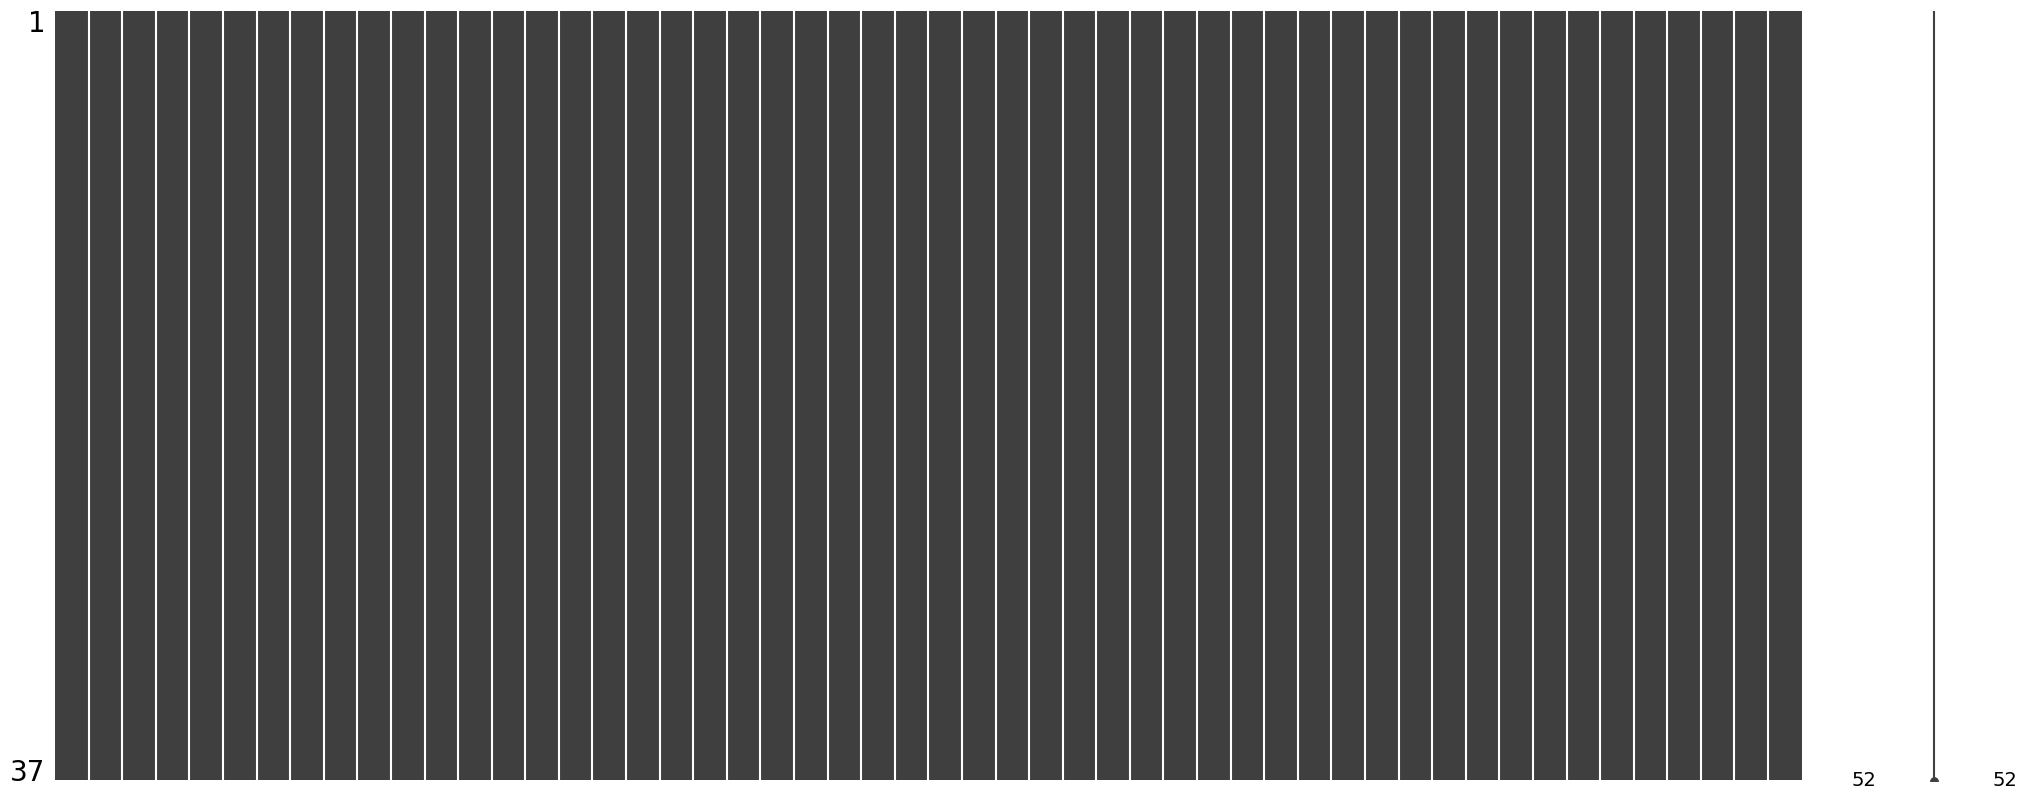

In [39]:
# Explicação código
# RODANDO
# List of columns to fill NaN values
columns_to_fill = atributos.columns[0:]

# Fill NaN values with 0 for each column
for column in columns_to_fill:
    atributos[column].fillna(0, inplace=True)


# Explicação código

ms.matrix(atributos)

In [40]:
datasetSemMissings = atributos

In [41]:
# RODANDO


datasetSemMissings = atributos

datasetSemMissings['N1'] = dataset['N1']
datasetSemMissings['N2'] = dataset['N2']
datasetSemMissings['N3'] = dataset['N3']
datasetSemMissings['N4'] = dataset['N4']
datasetSemMissings['N5'] = dataset['N5']
datasetSemMissings['N6'] = dataset['N6']
datasetSemMissings['EmissaoReducaoBunker'] = dataset['EmissaoReducaoBunker']
datasetSemMissings['Produto'] = dataset['Produto']
datasetSemMissings['Território'] = dataset['Território']
datasetSemMissings['AtividadeEconomica'] = dataset['AtividadeEconomica']

datasetSemMissings.head()

,Ano1970,Ano1971,Ano1972,Ano1973,Ano1974,Ano1975,Ano1976,Ano1977,Ano1978,Ano1979,...,N1,N2,N3,N4,N5,N6,EmissaoReducaoBunker,Produto,Território,AtividadeEconomica
505,1.202795e+08,1.255897e+08,1.309034e+08,1.362156e+08,1.416780e+08,1.562657e+08,1.636468e+08,1.608285e+08,1.601617e+08,1.626115e+08,...,Agropecuaria,Fermentacao_EntÃ©rica,Diretas,Outros,Animal,Gado_de_Corte,Emissao,CAR,BR,PEC
506,1.159838e+08,1.211044e+08,1.262282e+08,1.313507e+08,1.366180e+08,1.506848e+08,1.578022e+08,1.550847e+08,1.544416e+08,1.568039e+08,...,Agropecuaria,Fermentacao_EntÃ©rica,Diretas,Outros,Animal,Gado_de_Corte,Emissao,CAR,BR,PEC
504,1.073924e+08,1.121337e+08,1.168780e+08,1.216211e+08,1.264982e+08,1.395230e+08,1.461132e+08,1.435969e+08,1.430015e+08,1.451888e+08,...,Agropecuaria,Fermentacao_EntÃ©rica,Diretas,Outros,Animal,Gado_de_Corte,Emissao,CAR,BR,PEC
503,9.020964e+07,9.419229e+07,9.817751e+07,1.021617e+08,1.062585e+08,1.171993e+08,1.227351e+08,1.206214e+08,1.201213e+08,1.219586e+08,...,Agropecuaria,Fermentacao_EntÃ©rica,Diretas,Outros,Animal,Gado_de_Corte,Emissao,CAR,BR,PEC
514,2.391833e+07,2.500407e+07,2.608649e+07,2.716918e+07,2.823962e+07,3.200962e+07,3.344485e+07,3.682342e+07,3.679954e+07,3.872332e+07,...,Agropecuaria,Fermentacao_EntÃ©rica,Diretas,Outros,Animal,Gado_de_Leite,Emissao,LEI,BR,PEC


In [42]:
# Explicar visualização
# Inserir valores de cada agrupamento

print(datasetSemMissings.groupby('N1').size())
print("Total:", sum(datasetSemMissings.groupby('N1').size()), "Valor")
print(" ")
print(datasetSemMissings.groupby('N2').size())
print("Total:", sum(datasetSemMissings.groupby('N2').size()))
print(" ")
print(datasetSemMissings.groupby('N3').size())
print("Total:", sum(datasetSemMissings.groupby('N3').size()))
print(" ")
print(datasetSemMissings.groupby('N4').size())
print("Total:", sum(datasetSemMissings.groupby('N4').size()))
print(" ")
print(datasetSemMissings.groupby('N5').size())
print("Total:", sum(datasetSemMissings.groupby('N5').size()))
print(" ")
print(datasetSemMissings.groupby('N6').size())
print("Total:", sum(datasetSemMissings.groupby('N6').size()))
print(" ")
print(datasetSemMissings.groupby('EmissaoReducaoBunker').size())
print("Total:", sum(datasetSemMissings.groupby('EmissaoReducaoBunker').size()))
print(" ")
print(datasetSemMissings.groupby('Produto').size())
print("Total:", sum(datasetSemMissings.groupby('Produto').size()))
print(" ")
print(datasetSemMissings.groupby('AtividadeEconomica').size())
print("Total:", sum(datasetSemMissings.groupby('AtividadeEconomica').size()))

N1
Agropecuaria                          10
Energia                                9
Mudanca_de_Uso_da_Terra_e_Floresta    18
dtype: int64
Total: 37 Valor
 
N2
AlteracÃµes_de_Uso_da_Terra               9
EmissÃµes_pela_Queima_de_Combustiveis     9
Fermentacao_EntÃ©rica                    10
Remocao_em_areas_Protegidas               9
dtype: int64
Total: 37
 
N3
Amazonia       18
Diretas        10
Residencial     2
Transportes     7
dtype: int64
Total: 37
 
N4
Outros                    10
Rodoviario                 7
em_area_Protegida          9
fora_de_area_Protegida     9
dtype: int64
Total: 35
 
N5
Animal                      10
Desmatamento                 9
Diesel_de_petroleo           3
Gasolina_automotiva          4
Lenha                        2
Vegetacao_nativa_estavel     9
dtype: int64
Total: 37
 
N6
Automoveis                              4
CaminhÃµes                              3
Consumo_Final_EnergÃ©tico               2
Floresta_primaria__Floresta_primaria    9
Floresta_p

In [43]:
print(atributos.Ano1970)

505      1.202795e+08
506      1.159838e+08
504      1.073924e+08
503      9.020964e+07
514      2.391833e+07
515      2.306411e+07
2758     2.275304e+07
2759     2.206676e+07
499      2.147849e+07
500      2.147849e+07
513      0.000000e+00
7814     0.000000e+00
7812     0.000000e+00
7811     0.000000e+00
7810     0.000000e+00
512      0.000000e+00
7919     0.000000e+00
7920     0.000000e+00
7923     0.000000e+00
8209     0.000000e+00
8210     0.000000e+00
8211     0.000000e+00
8212     0.000000e+00
8213     0.000000e+00
8214     0.000000e+00
8215     0.000000e+00
8216     0.000000e+00
8217     0.000000e+00
10194    0.000000e+00
10195    0.000000e+00
10196    0.000000e+00
10197    0.000000e+00
10198    0.000000e+00
10199    0.000000e+00
10200    0.000000e+00
10201    0.000000e+00
10202    0.000000e+00
Name: Ano1970, dtype: float64


In [ ]:
# Especifica o filtro em 'N1'
AtivEcon = "Agropecuaria"

# Inicializa a variável de soma
soma_total = 0
valor_totalAnos = 0

# Itera ao longo dos anos e calcula a soma para cada ano
print(f"Para '{AtivEcon}':")
for ano in range(1970, 2022):
    soma_ano = datasetSemMissings.loc[datasetSemMissings['N1'] == AtivEcon, f'Ano{ano}'].sum()

    # Calcula a porcentagem de participação para o ano
    porcentagem_participacao = (soma_ano / datasetSemMissings[f'Ano{ano}'].sum()) * 100
    valor_totalAnos = valor_totalAnos+soma_ano

    soma_total += soma_ano
    print(f"'{ano}' - {soma_ano}.")

# Imprime a soma total e a porcentagem da participação
print(f"\nSoma total para '{AtivEcon}': {valor_totalAnos}.")
print(f"Participação de emissões de '{AtivEcon}' em 'Ano{ano}': {porcentagem_participacao:.2f}%")


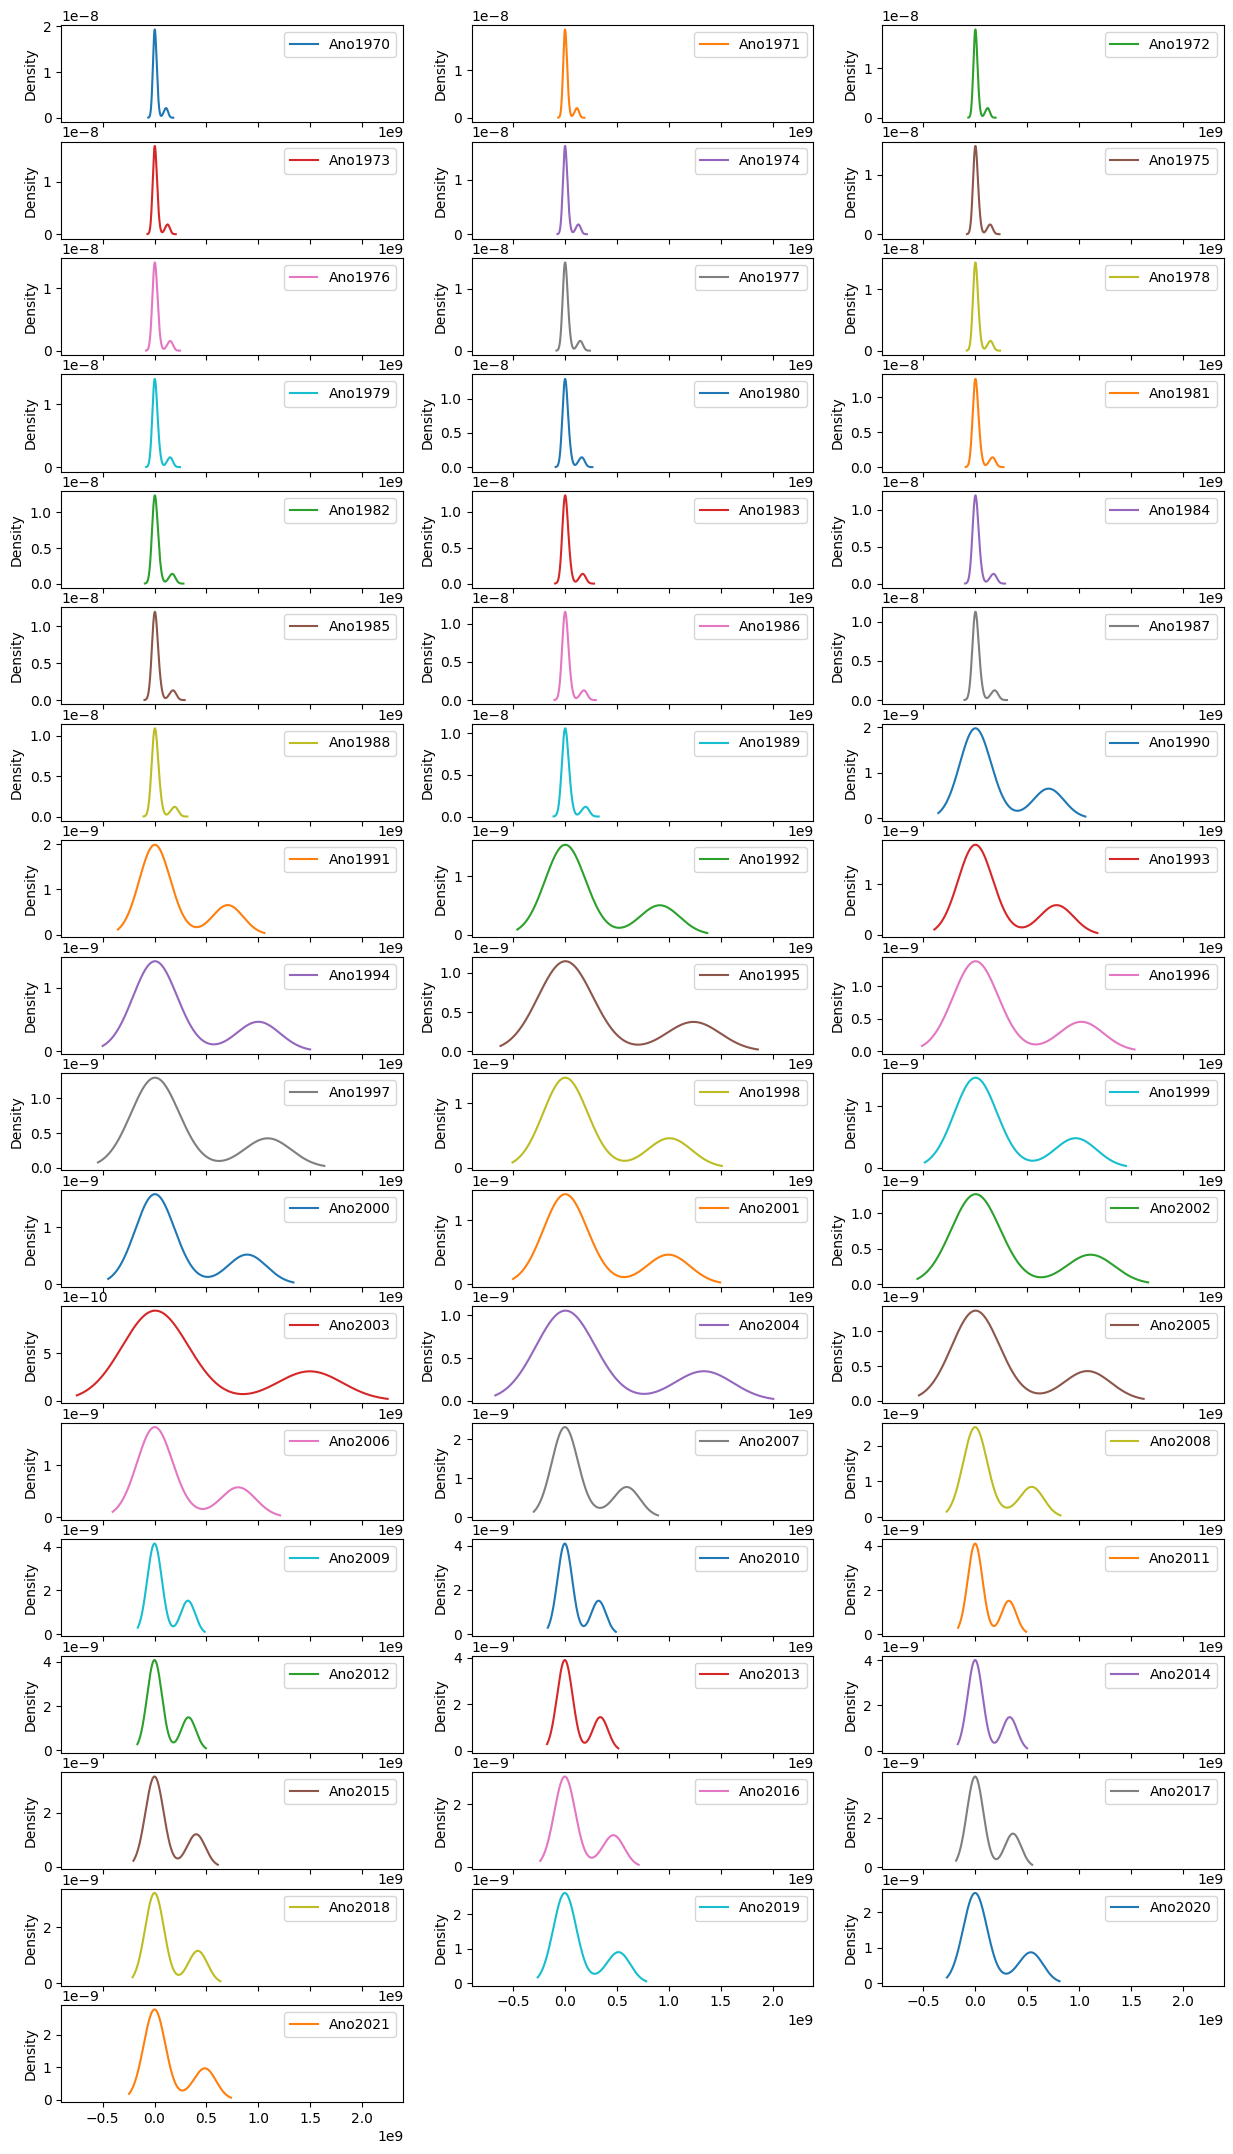

In [48]:
# Cria um único subplot
fig, ax = plt.subplots(figsize=(15, 30))

# Plota a densidade para todas as colunas em um único subplot
datasetSemMissings.plot(kind='density', subplots=True, layout=(20, 3), sharex=True, ax=ax)

# Define os rótulos do eixo x
ax.set_xlabel('Eixo X')


# Exibe o gráfico
plt.show()

### 4.2. Separação em conjunto de treino e conjunto teste

AMBOS ABAIXO RODANDO MAS SEM EXPLICAÇÃO

In [49]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação


In [50]:
print(array)

[['Processos_Industriais' 'Industria_Quimica' 'Producao_de_Amonia' ...
  1985663.51 1985663.51 1985663.51]
 ['Processos_Industriais' 'Industria_Quimica'
  'Producao_de_Carbureto_de_Calcio' ... 42000.0 42000.0 42000.0]
 ['Processos_Industriais' 'Industria_Quimica' 'Producao_de_Metanol' ...
  21421.4634 21421.4634 21421.4634]
 ...
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3147567.0
  10675682.0 0.0]
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3155415.0
  10722317.0 0.0]
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3149790.0
  10699479.0 0.0]]


In [51]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = dataset.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

In [52]:
print(array)

[['Processos_Industriais' 'Industria_Quimica' 'Producao_de_Amonia' ...
  1985663.51 1985663.51 1985663.51]
 ['Processos_Industriais' 'Industria_Quimica'
  'Producao_de_Carbureto_de_Calcio' ... 42000.0 42000.0 42000.0]
 ['Processos_Industriais' 'Industria_Quimica' 'Producao_de_Metanol' ...
  21421.4634 21421.4634 21421.4634]
 ...
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3147567.0
  10675682.0 0.0]
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3155415.0
  10722317.0 0.0]
 ['Mudanca_de_Uso_da_Terra_e_Floresta'
  'Queimadas_Nao_Associadas_a_Desmatamento' 'Pantanal' ... 3149790.0
  10699479.0 0.0]]


## Conclusão

## Referências

SEEG – Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em 22/11/2023.

IPCC, 2023: Sections. Em: Climate Change 2023: Synthesis Report. Contribution of Working Groups I, II and III to the Sixth
Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, H. Lee and J. Romero (eds.)]. IPCC,
Geneva, Switzerland, pp. 35-115, doi: 10.59327/IPCC/AR6-9789291691647

ESPÍNOLA, I. B.; RIBEIRO, W. C. (2020). Cidades e mudanças climáticas: desafios para os planos diretores municipais brasileiros. Cadernos Metrópole. São Paulo, v. 22, n. 48, pp. 365-395.

Convenção-Quadro das Nações Unidas sobre Mudanças Climáticas (em inglês, United Nations Framework Convention on Climate Change ou UNFCCC). Adoção do Acordo de Paris, 2015. Acesso em: 26/11/2023. Disponível em: https://unfccc.int/documents/9064

Exemplo MVP https://github.com/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/mvp-analise-de-dados-e-boas-praticas/MVP_CD_Diabetes.ipynb